# 1.Data

In [1]:
from google.colab import drive
drive.mount('/content/grive', force_remount = True)

Mounted at /content/grive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import re
import csv

In [3]:
df=pd.read_csv('/content/grive/MyDrive/Project/banking analysis/Bản sao của bank-additional-full.csv', delimiter=';')
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info()
#kiểm tra data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Kiểm tra missing values**

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.shape

(41188, 21)

#Data Transformation 

**Rename**

In [8]:
df_v2=df.rename(columns={'marital':'marital_status','education':'educational_attainment',
                         'default':'credit_in_default','housing':'housing_loan','loan':'personal_loan',
                         'contact':'contact_type','day_of_week':'last_contact_day','month':'last_contact_month',
                         'duration':'last_contact_duration','campaign':'current_camp_contact_count',
                         'pdays':'days_after_previous_camp','previous':'previous_camp_contact_count',
                         'poutcome':'previous_outcome','y':'current_outcome','emp.var.rate':'employment_variation_rate',
                         'euribor3m':'euro_interbank_rate','nr.employed':'number_of_employees',
                         'cons.price.idx':'consumer_price_index', 'cons.conf.idx':'consumer_confidence_index',
                         'days_after_previous_camp_bool':'contacted_or_not'})
df_v2.columns

Index(['age', 'job', 'marital_status', 'educational_attainment',
       'credit_in_default', 'housing_loan', 'personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day', 'last_contact_duration',
       'current_camp_contact_count', 'days_after_previous_camp',
       'previous_camp_contact_count', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euro_interbank_rate',
       'number_of_employees', 'current_outcome'],
      dtype='object')

**kiểm tra dữ liệu lặp**

In [9]:
df_v2.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [10]:
df_v2[df_v2.duplicated()]

,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,current_camp_contact_count,days_after_previous_camp,previous_camp_contact_count,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
df_v3 = df.copy()

In [12]:
df_v2=df_v2.drop_duplicates()
df_v2.duplicated().value_counts()
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          41176 non-null  int64  
 1   job                          41176 non-null  object 
 2   marital_status               41176 non-null  object 
 3   educational_attainment       41176 non-null  object 
 4   credit_in_default            41176 non-null  object 
 5   housing_loan                 41176 non-null  object 
 6   personal_loan                41176 non-null  object 
 7   contact_type                 41176 non-null  object 
 8   last_contact_month           41176 non-null  object 
 9   last_contact_day             41176 non-null  object 
 10  last_contact_duration        41176 non-null  int64  
 11  current_camp_contact_count   41176 non-null  int64  
 12  days_after_previous_camp     41176 non-null  int64  
 13  previous_camp_co

In [13]:
df_v2['days_after_previous_camp_bool']=np.where(df_v2['days_after_previous_camp']== 999, 'no', 'yes')
df_v2['days_after_previous_camp_bool'].value_counts()
df_v2

,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,days_after_previous_camp,previous_camp_contact_count,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome,days_after_previous_camp_bool
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no


In [14]:
df_v2=df_v2.rename(columns={'days_after_previous_camp_bool':'contacted_or_not'})
df_v2

,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,days_after_previous_camp,previous_camp_contact_count,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome,contacted_or_not
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no


**Converting seconds to hours:minutes:seconds**

In [15]:
df_v2['last_contact_duration_min']=df['duration']/60
df_v2['last_contact_duration_min'].max()

81.96666666666667

**Converting binary variables to 1 and 0 for visualization of bivariate and multivariate data**

In [16]:
df_v2 = df_v2.replace(to_replace = ['yes','no'],value = ['1','0'])
df_v2


,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,previous_camp_contact_count,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome,contacted_or_not,last_contact_duration_min
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,4.350000
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,2.483333
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,3.766667
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,2.516667
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,5.116667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,5.566667
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,6.383333
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,3.150000
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,7.366667


**Đổi age vào các range khác nhau**

In [17]:
def age_groups(row):
    if row['age'] < 25:
        return 'under 25'
    elif row['age'] >= 25 and row['age'] < 35:
        return '25-35'
    elif row['age'] >= 35 and row['age'] < 45:
        return '35-45'
    elif row['age'] >= 45 and row['age'] < 55:
        return '45-55'
    elif row['age'] >= 55 and row['age'] < 65:
        return '55-65'
    else:
        return 'above 65'
df_v2['age_groups'] = df_v2.apply(age_groups, axis=1)
df_v2

,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome,contacted_or_not,last_contact_duration_min,age_groups
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,4.350000,55-65
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,2.483333,55-65
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,3.766667,35-45
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,2.516667,35-45
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,5.116667,55-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,5.566667,above 65
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,6.383333,45-55
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,3.150000,55-65
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,7.366667,35-45


**Đổi duration vào các range khác nhau**

In [18]:
def duration_groups(row):
    if row['last_contact_duration_min'] < 0:
        return '0'
    elif row['last_contact_duration_min'] > 0 and row['last_contact_duration_min'] < 1:
        return 'under 1 min'
    elif row['last_contact_duration_min'] > 1 and row['last_contact_duration_min'] < 2:
        return '1-2 min'
    elif row['last_contact_duration_min'] > 2 and row['last_contact_duration_min'] < 4:
        return '2-4 min'
    elif row['last_contact_duration_min'] > 4 and row['last_contact_duration_min'] < 6:
        return '4-6 min'
    elif row['last_contact_duration_min'] > 6 and row['last_contact_duration_min'] < 8:
        return '6-8 min'
    else:
        return 'above 8'


df_v2['duration_min_groups'] = df_v2.apply(duration_groups, axis=1)
df_v2

,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome,contacted_or_not,last_contact_duration_min,age_groups,duration_min_groups
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,4.350000,55-65,4-6 min
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,2.483333,55-65,2-4 min
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,3.766667,35-45,2-4 min
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,2.516667,35-45,2-4 min
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,5.116667,55-65,4-6 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,0,5.566667,above 65,4-6 min
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,0,6.383333,45-55,6-8 min
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,0,3.150000,55-65,2-4 min
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,0,7.366667,35-45,6-8 min


In [19]:
df_v2.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,last_contact_duration,current_camp_contact_count,days_after_previous_camp,previous_camp_contact_count,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,last_contact_duration_min
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,4.305264
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,4.321755
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
1%,23.00000,11.000000,1.000000,3.000000,0.000000,-3.400000,92.201000,-49.500000,0.658000,4963.600000,0.183333
5%,26.00000,36.000000,1.000000,999.000000,0.000000,-2.900000,92.713000,-47.100000,0.797000,5017.500000,0.600000
10%,28.00000,59.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.046000,5076.200000,0.983333
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.700000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,5.316667


In [20]:
df_v3=df_v2.clip(lower=df_v2.quantile(0.01),upper=df_v2.quantile(0.99), axis=1)

df_v3.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

<ipython-input-20-5686fc028e3d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_v3=df_v2.clip(lower=df_v2.quantile(0.01),upper=df_v2.quantile(0.99), axis=1)


,age,last_contact_duration,current_camp_contact_count,days_after_previous_camp,previous_camp_contact_count,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,last_contact_duration_min
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.976370,254.410652,2.500291,962.468647,0.162449,0.081922,93.574107,-40.495398,3.621392,5167.034870,4.240178
std,10.137591,235.211228,2.301416,186.917386,0.433295,1.570883,0.576028,4.612562,1.734191,72.251364,3.920187
min,23.000000,11.000000,1.000000,3.000000,0.000000,-3.400000,92.201000,-49.500000,0.658000,4963.600000,0.183333
1%,23.000000,11.000000,1.000000,3.000000,0.000000,-3.400000,92.201000,-49.500000,0.658750,4963.600000,0.183333
5%,26.000000,36.000000,1.000000,999.000000,0.000000,-2.900000,92.713000,-47.100000,0.797000,5017.500000,0.600000
10%,28.000000,59.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.046000,5076.200000,0.983333
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.700000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,5.316667


**Encoding biến phân loại**

In [21]:
df_v2_encoded=pd.get_dummies(df_v2)
df_v2_encoded.columns

Index(['age', 'last_contact_duration', 'current_camp_contact_count',
       'days_after_previous_camp', 'previous_camp_contact_count',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euro_interbank_rate',
       'number_of_employees', 'last_contact_duration_min', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'marital_status_unknown',
       'educational_attainment_basic.4y', 'educational_attainment_basic.6y',
       'educational_attainment_basic.9y', 'educational_attainment_high.school',
       'educational_attainment_illiterate',
       'educational_attainment_professional.course',
       'educational_attainment_university.degree',
       'educational_attainment_unknow

#Banking Analysis


In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
def plot_numeric(field, xlabel, ylabel):   
    # Histogram
    plt.hist(df_v2[field], bins='auto', color='cadetblue', edgecolor='grey', histtype='bar', rwidth=1)
    plt.title(field.capitalize(), fontsize=18)
    plt.xlabel(xlabel.capitalize(), fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.xticks(fontsize = 12, rotation = 75)
    plt.style.use('seaborn-whitegrid')
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
     # Frequency table
    Absolute = df_v2[field].value_counts(ascending=False)
    Percent = round((df_v2[field].value_counts(normalize=True))*100,2)
    field_pd=pd.DataFrame({'counts': Absolute, 'percentage': Percent})
    print(field_pd)
    
    
    #Probability Distribution
    sns.kdeplot(data=df_v2[field], color='cadetblue',shade='paleturquoise')
    plt.xlabel(xlabel.capitalize(), fontsize = 14)
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
    #Box-plot
    sns.boxenplot(data=df_v2[field],color='cadetblue', orient="h")
    plt.xlabel(xlabel.capitalize(), fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
       
def plot_object(field, xlabel, ylabel):
    
    #Histogram
    plt.hist(df_v2[field], bins='auto',color='cadetblue', edgecolor='grey', histtype='bar', rwidth=1)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(field.capitalize(), fontsize=18)
    plt.xticks(fontsize = 12, rotation = 75)
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.grid(color='white')
    plt.show()
    
    #Frequency Table
    Absolute = df_v2[field].value_counts(ascending=False)
    Percent = round((df_v2[field].value_counts(normalize=True))*100,2)
    field_pd=pd.DataFrame({'counts': Absolute, 'percentage': Percent})
    print(field_pd)
    
# Function to plot visuals depending on data type
def plot_field(df_v2, field, xlabel, ylabel):
    if df_v2[field].dtype == 'int64' or df_v2[field].dtype =='float64':
        plot_numeric(field, xlabel, ylabel)
    elif df_v2[field].dtype == 'object':
        plot_object(field, xlabel, ylabel)   


**Age**


<ipython-input-22-8c7fc709d80a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


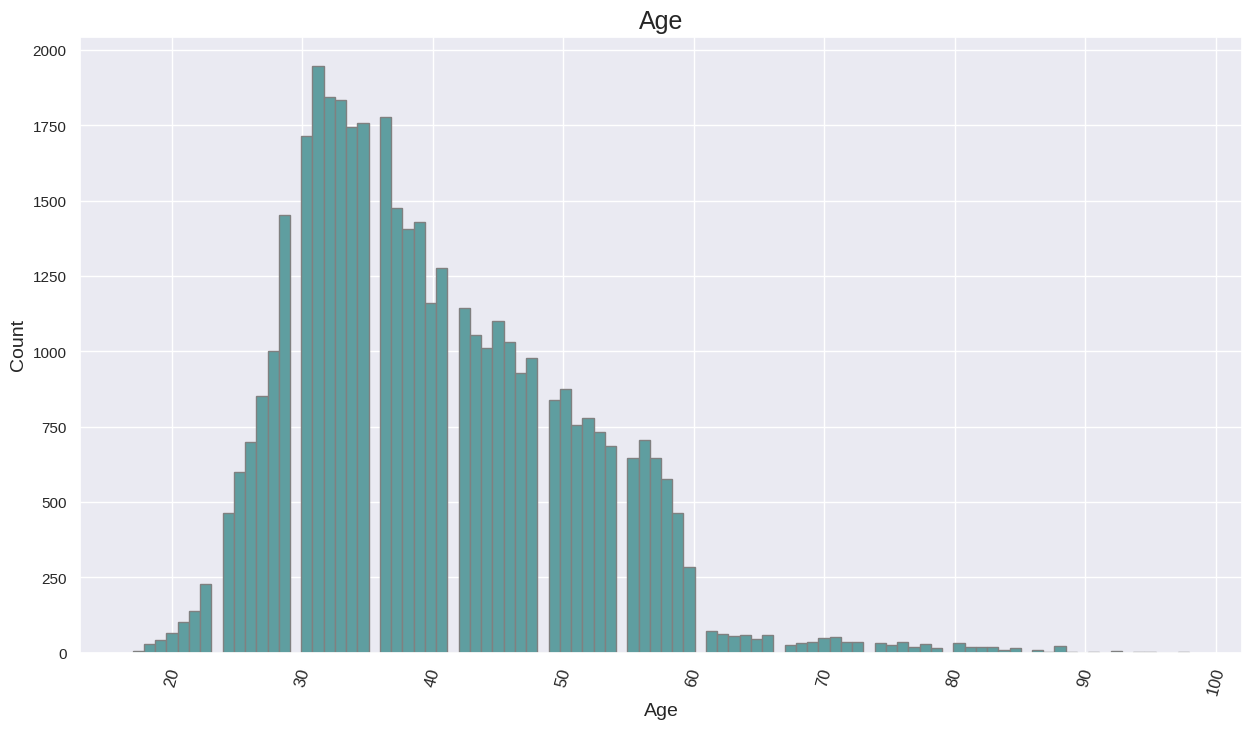

    counts  percentage
31    1947        4.73
32    1845        4.48
33    1833        4.45
36    1779        4.32
35    1758        4.27
..     ...         ...
89       2        0.00
91       2        0.00
94       1        0.00
87       1        0.00
95       1        0.00

[78 rows x 2 columns]


<ipython-input-22-8c7fc709d80a>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=paleturquoise`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_v2[field], color='cadetblue',shade='paleturquoise')


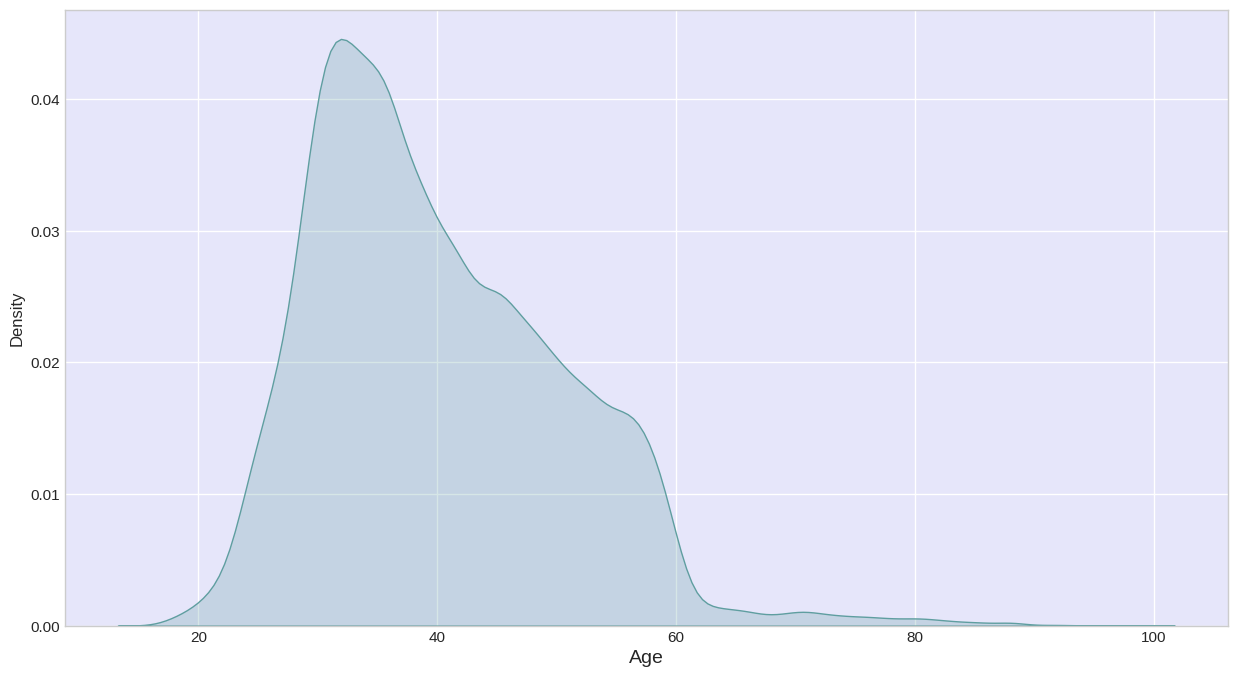

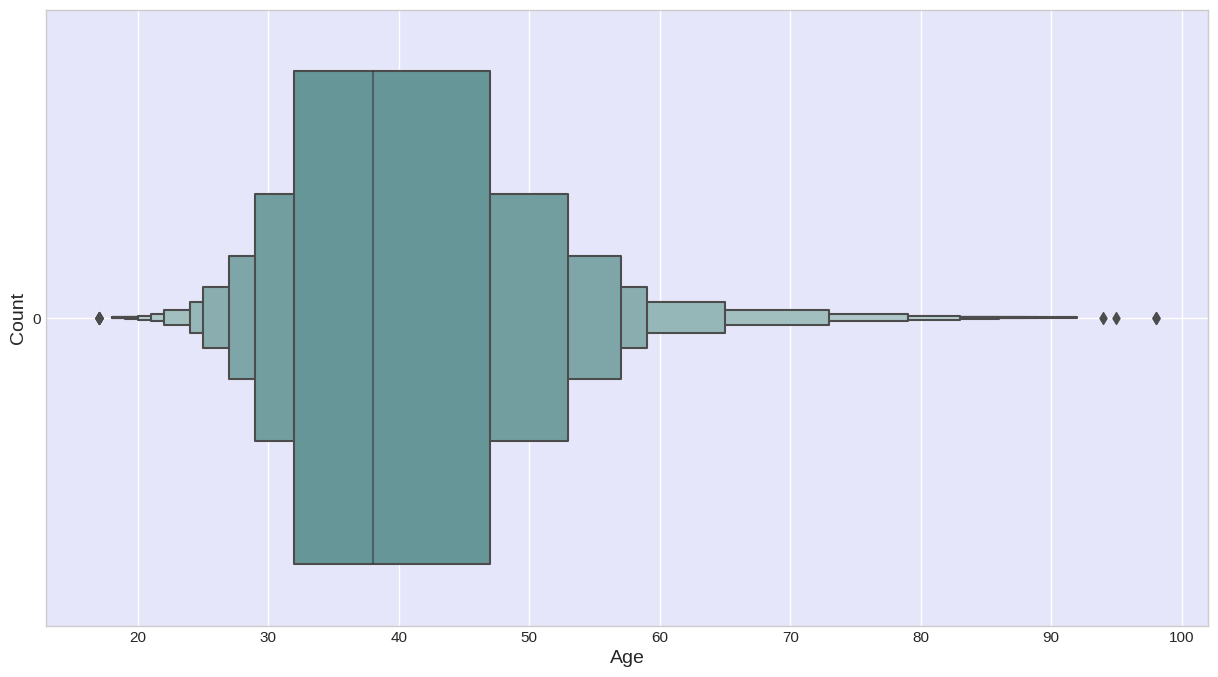

In [23]:
field="age"
xlabel="Age"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

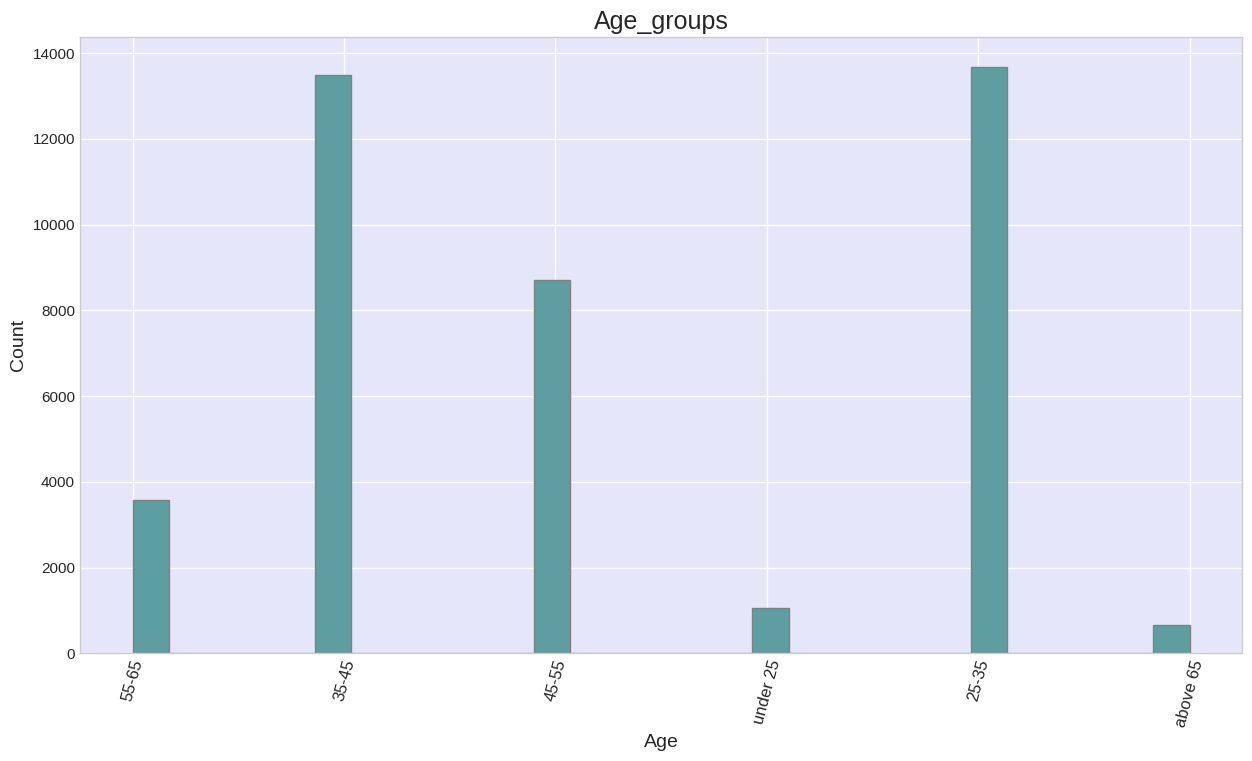

          counts  percentage
25-35      13684       33.23
35-45      13495       32.77
45-55       8702       21.13
55-65       3566        8.66
under 25    1067        2.59
above 65     662        1.61


In [24]:
field="age_groups"
xlabel="Age"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

* Ba nhóm tuổi lớn nhất được mục tiêu trong chiến dịch là "25-35", "35-45" và "45-55".
* Nhóm nhỏ nhất là "trên 65".

**Job**



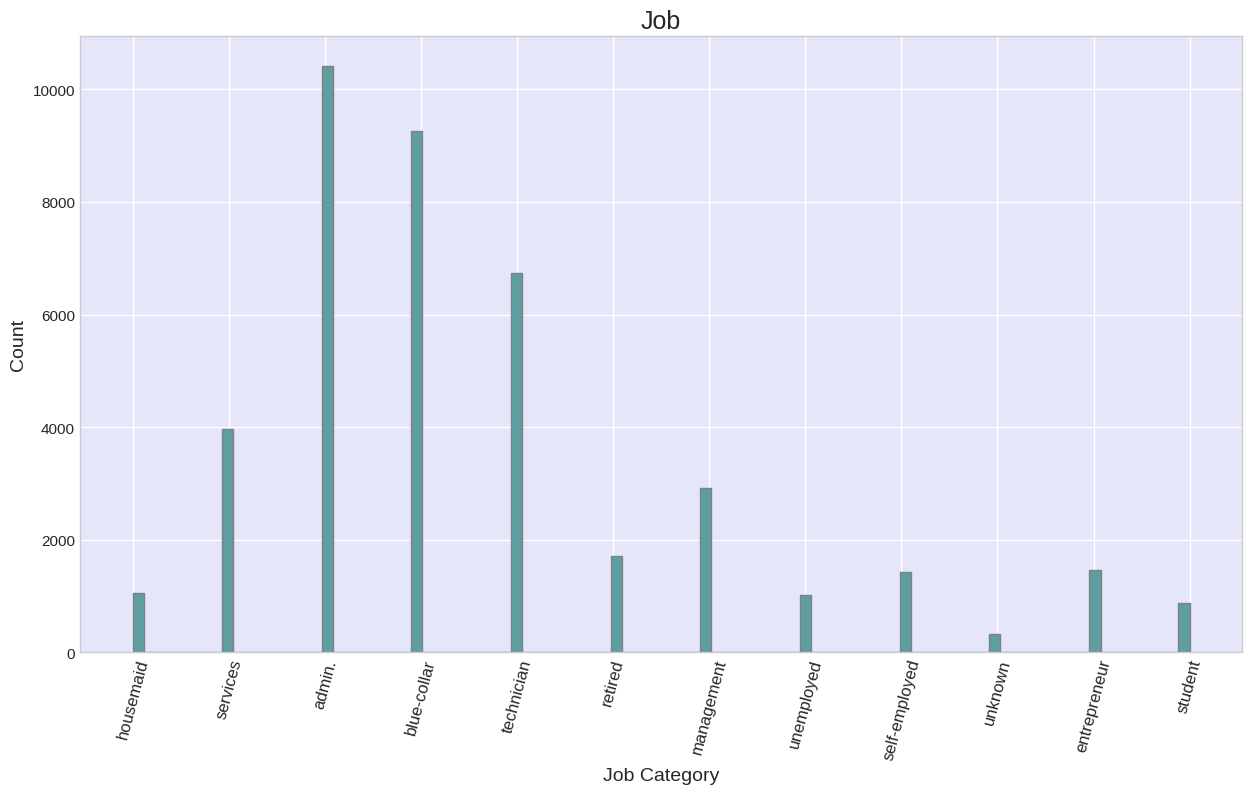

               counts  percentage
admin.          10419       25.30
blue-collar      9253       22.47
technician       6739       16.37
services         3967        9.63
management       2924        7.10
retired          1718        4.17
entrepreneur     1456        3.54
self-employed    1421        3.45
housemaid        1060        2.57
unemployed       1014        2.46
student           875        2.13
unknown           330        0.80


In [25]:
field="job"
xlabel="Job Category"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)


* Các nhóm công việc lớn nhất gồm admin, blue-collar, technician. Những nghề nghiệp này chiếm khoảng hơn 50% tổng số khách hàng.
* Ba nhóm nhỏ nhất gồm unemployed, student, unknown. => có thể giả định rằng họ không có tiền tiết kiệm để gửi tiền.
* Các nhóm "management", "retired" và "services" không được tiếp cận một cách tích cực mặc dù nhóm này có thể có tiền tiết kiệm để đầu tư vào gửi tiền.



**Marital**



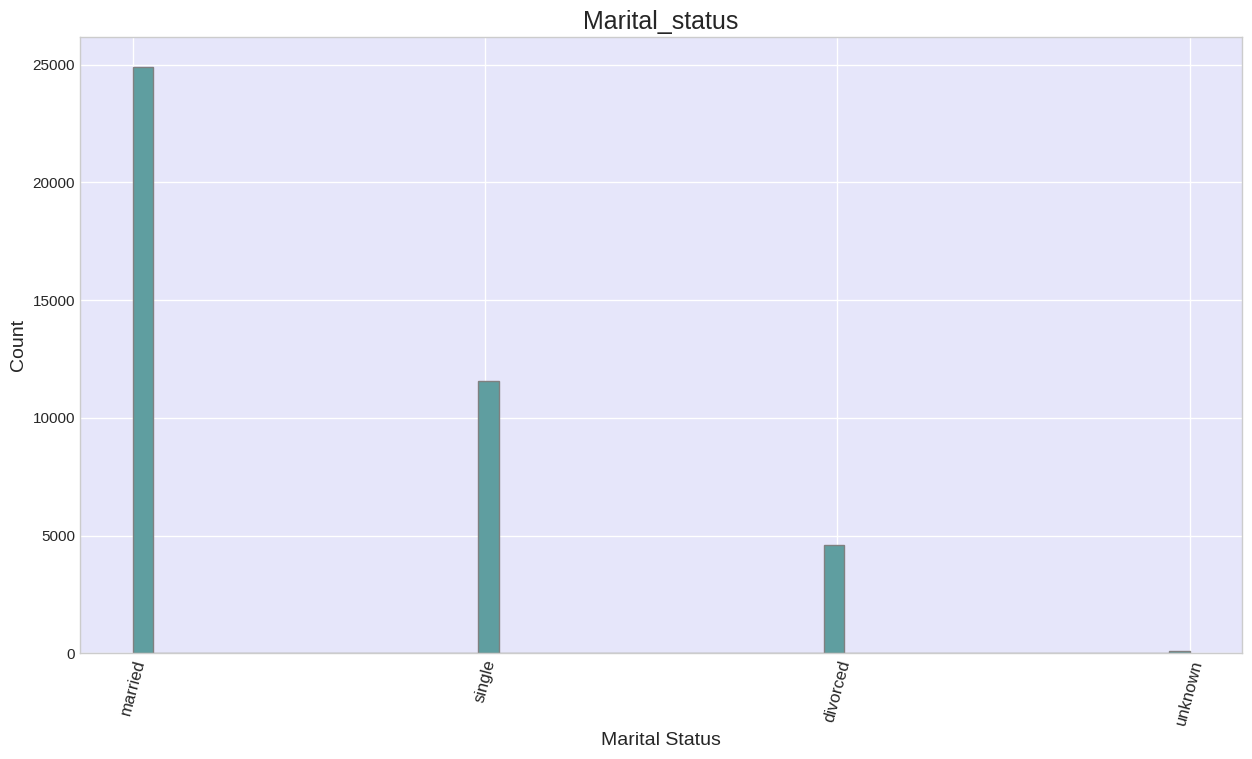

          counts  percentage
married    24921       60.52
single     11564       28.08
divorced    4611       11.20
unknown       80        0.19


In [26]:
field="marital_status"
xlabel="Marital Status"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

* Đa số là có gia đình và độc thân

**Education**





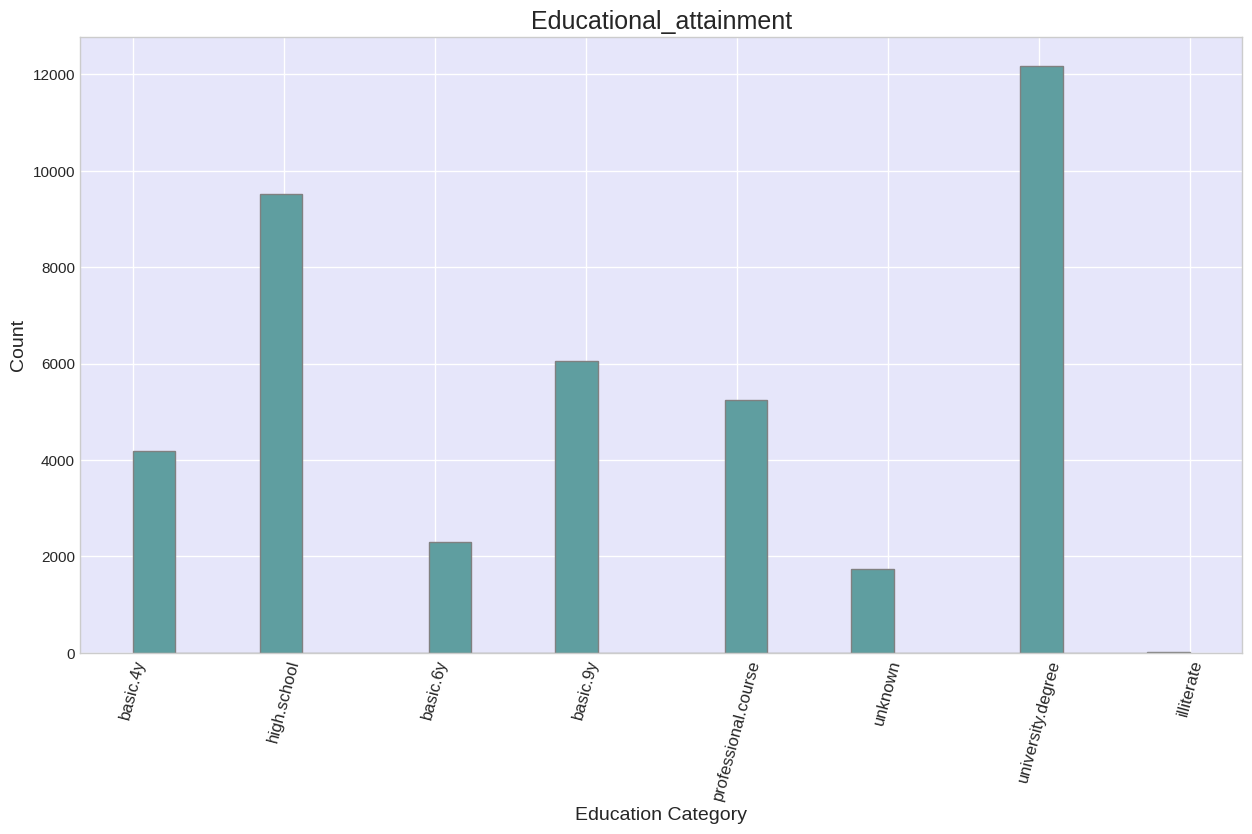

                     counts  percentage
university.degree     12164       29.54
high.school            9512       23.10
basic.9y               6045       14.68
professional.course    5240       12.73
basic.4y               4176       10.14
basic.6y               2291        5.56
unknown                1730        4.20
illiterate               18        0.04


In [27]:
field="educational_attainment"
xlabel="Education Category"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)


- Khoảng 30% dữ liệu trong tập dữ liệu có trình độ giáo dục cao.
- Khoảng 23% dữ liệu trong tập dữ liệu chỉ có bằng tốt nghiệp trung học.
- Phần còn lại của tập dữ liệu chỉ có học vấn từ 4 đến 9 năm hoặc các khóa học chuyên nghiệp.

**Housing: Có vay tiền mua nhà không?** 





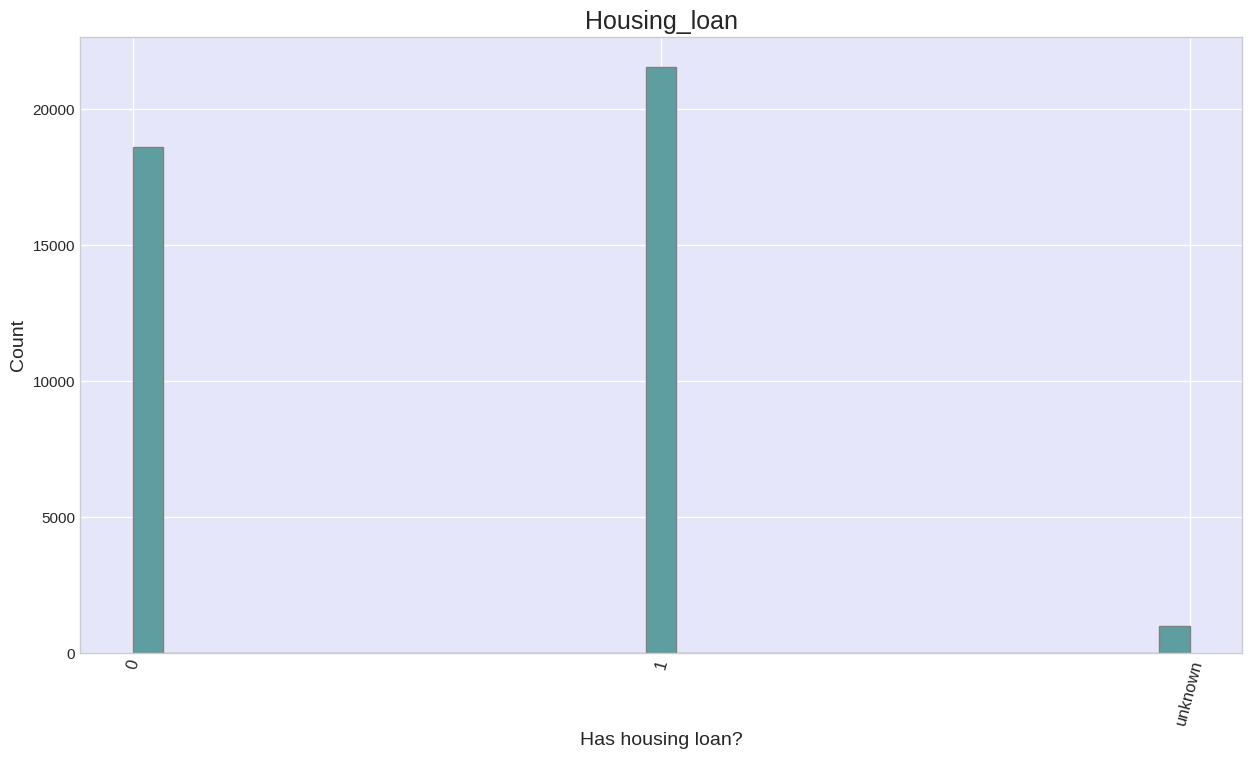

         counts  percentage
1         21571       52.39
0         18615       45.21
unknown     990        2.40


In [29]:
field="housing_loan"
xlabel="Has housing loan?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

- Có 52.39% người có khoản vay mua nhà và 45% không có.


**loan: có nợ xấu không?** 




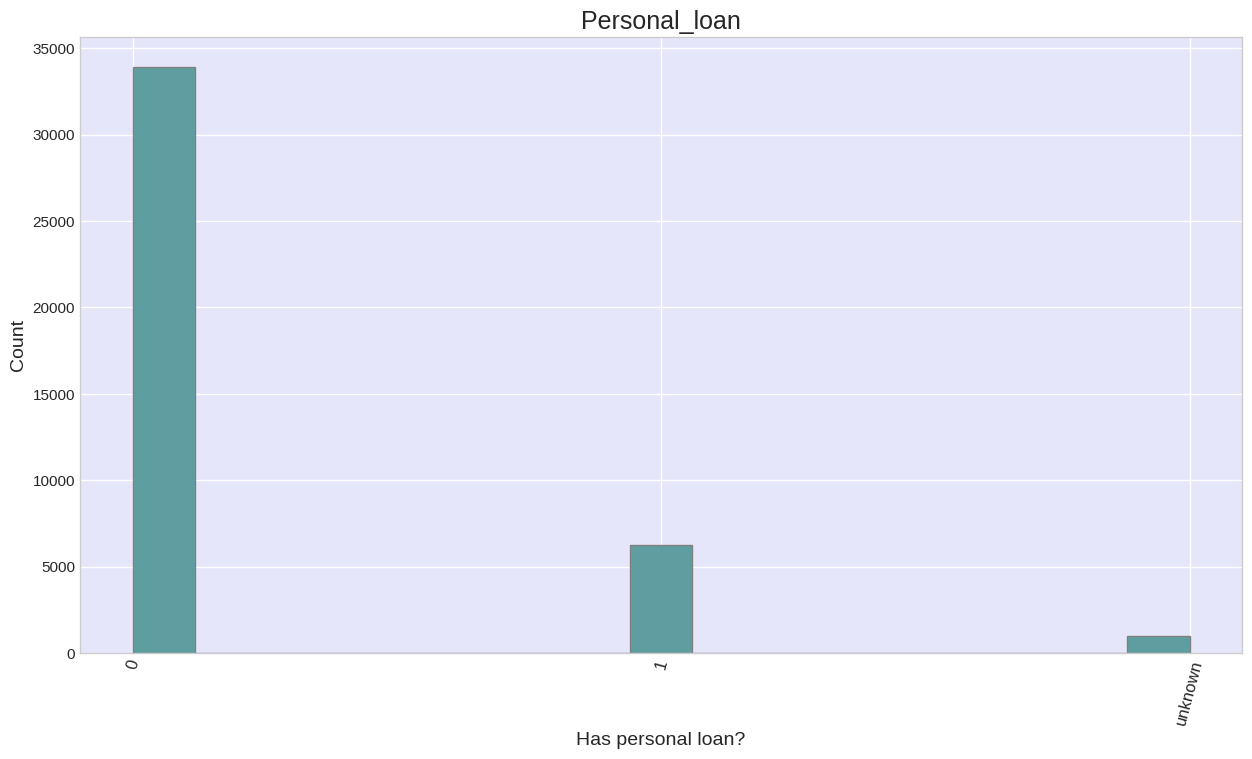

         counts  percentage
0         33938       82.42
1          6248       15.17
unknown     990        2.40


In [30]:
field="personal_loan"
xlabel="Has personal loan?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

- Đang nhắm đến khách hàng không có nợ xấu

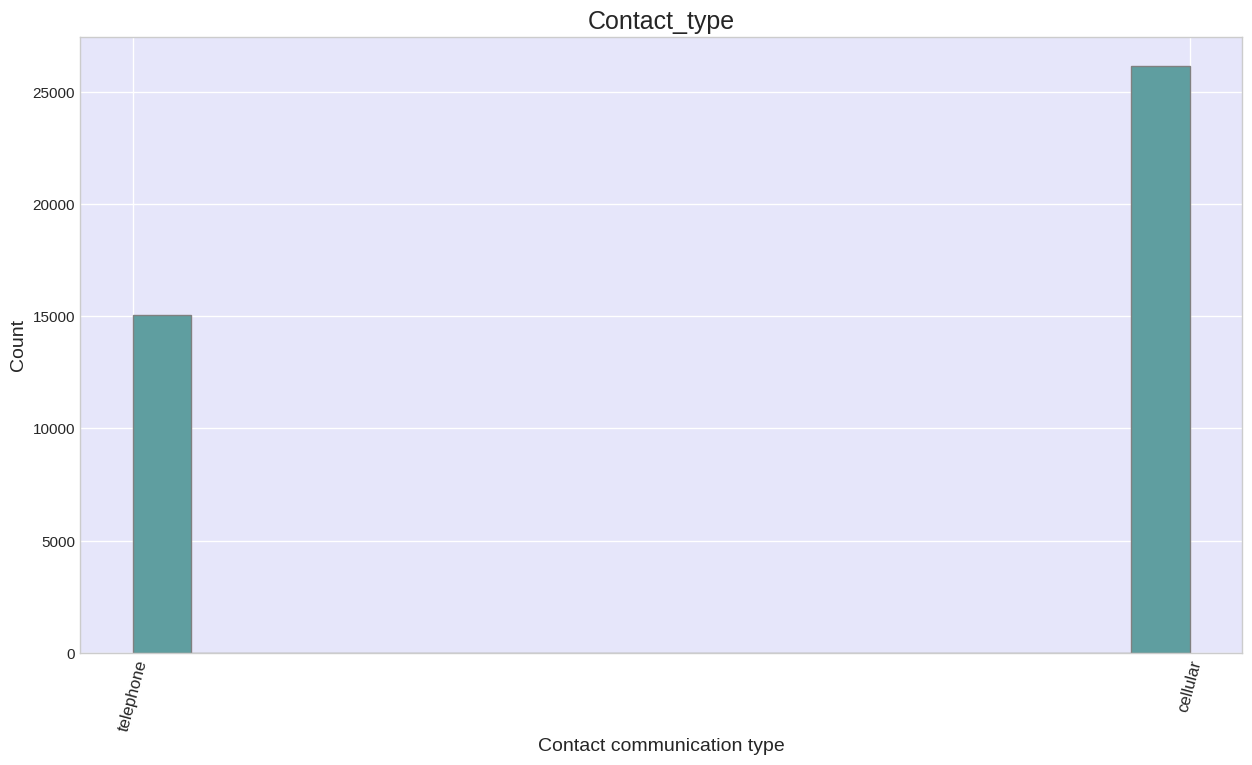

           counts  percentage
cellular    26135       63.47
telephone   15041       36.53


In [31]:
field="contact_type"
xlabel="Contact communication type"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**month**
    



In [32]:
df_v2['last_contact_month_num'] = df_v2['last_contact_month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug','sep','oct','nov','dec'], ['1-jan', '2-feb', '3-mar', '4-apr', '5-may', '6-jun', '7-jul','8-aug','9-sep','10-oct','11-nov','12-dec'])
df_v2

,age,job,marital_status,educational_attainment,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees,current_outcome,contacted_or_not,last_contact_duration_min,age_groups,duration_min_groups,last_contact_month_num
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,0,4.350000,55-65,4-6 min,5-may
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,0,2.483333,55-65,2-4 min,5-may
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,0,3.766667,35-45,2-4 min,5-may
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,0,2.516667,35-45,2-4 min,5-may
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,0,5.116667,55-65,4-6 min,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,1,0,5.566667,above 65,4-6 min,11-nov
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,0,0,6.383333,45-55,6-8 min,11-nov
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,0,0,3.150000,55-65,2-4 min,11-nov
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,1,0,7.366667,35-45,6-8 min,11-nov


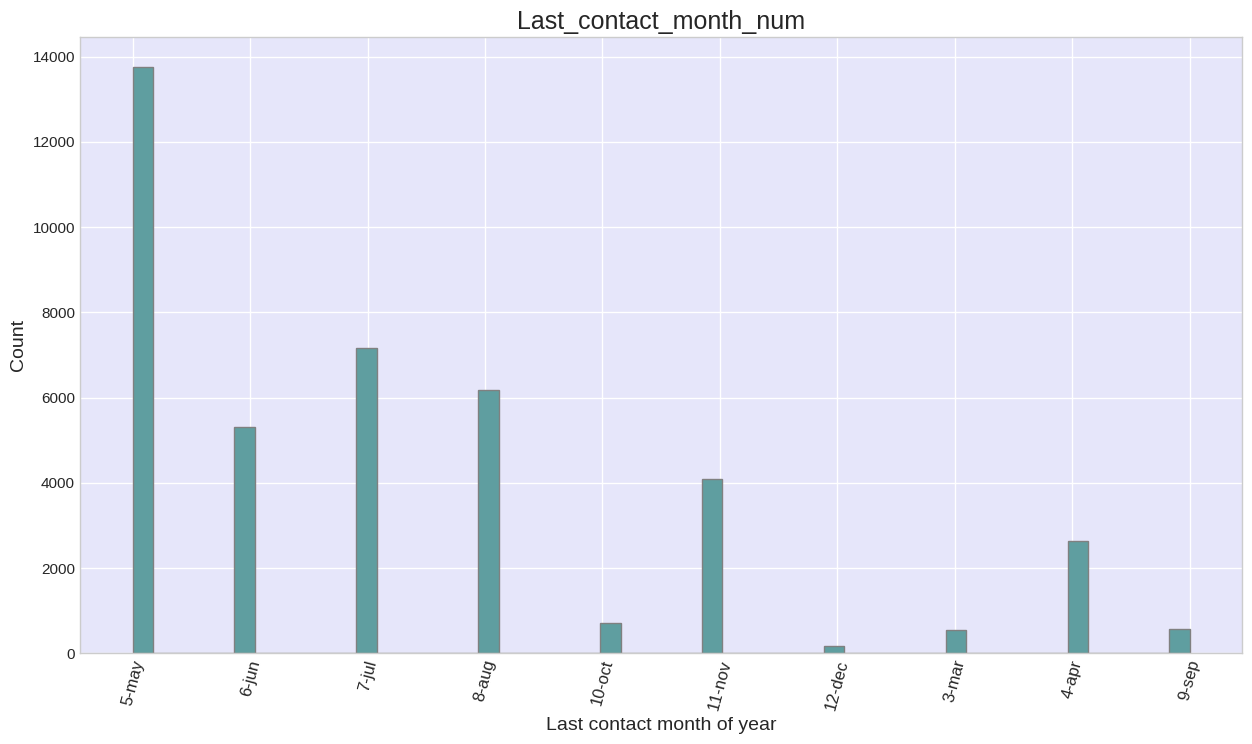

        counts  percentage
5-may    13767       33.43
7-jul     7169       17.41
8-aug     6176       15.00
6-jun     5318       12.92
11-nov    4100        9.96
4-apr     2631        6.39
10-oct     717        1.74
9-sep      570        1.38
3-mar      546        1.33
12-dec     182        0.44


In [33]:
field="last_contact_month_num"
xlabel="Last contact month of year"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**Day**
    



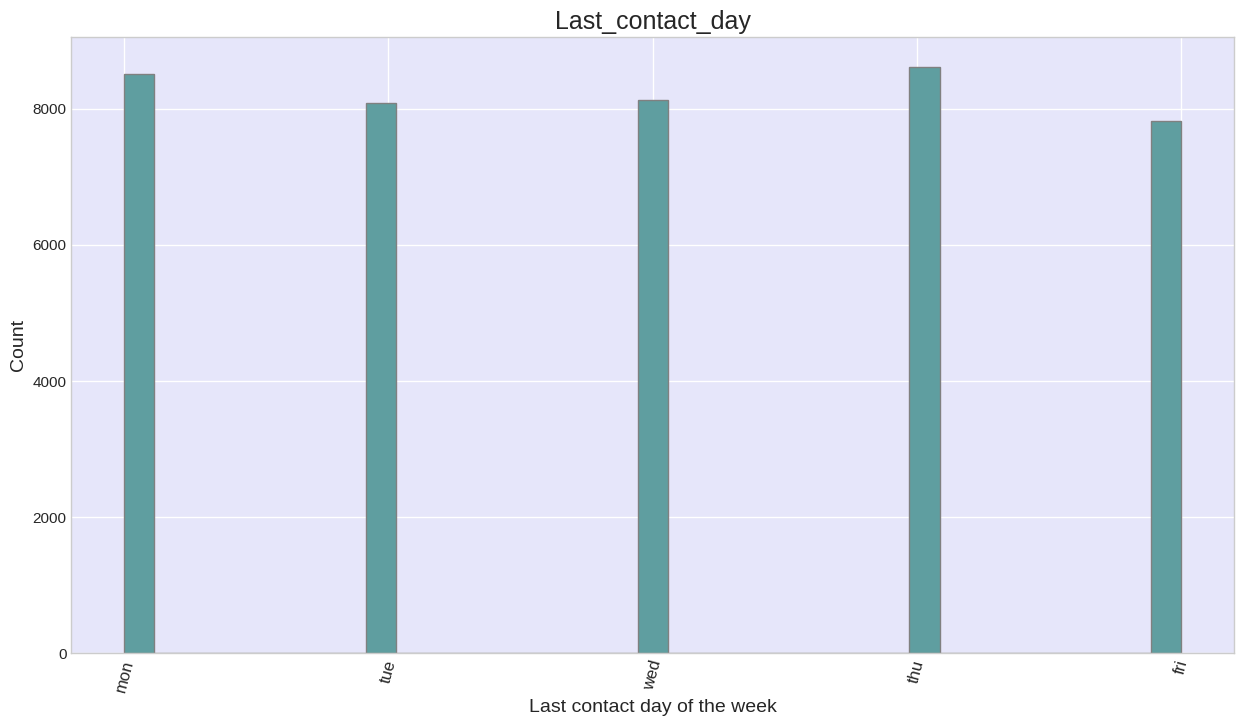

     counts  percentage
thu    8618       20.93
mon    8512       20.67
wed    8134       19.75
tue    8086       19.64
fri    7826       19.01


In [34]:
field="last_contact_day"
xlabel="Last contact day of the week"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

Có khoảng 8k cuộc gọi mỗi ngày

**Duration(numeric)**. 



<ipython-input-22-8c7fc709d80a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


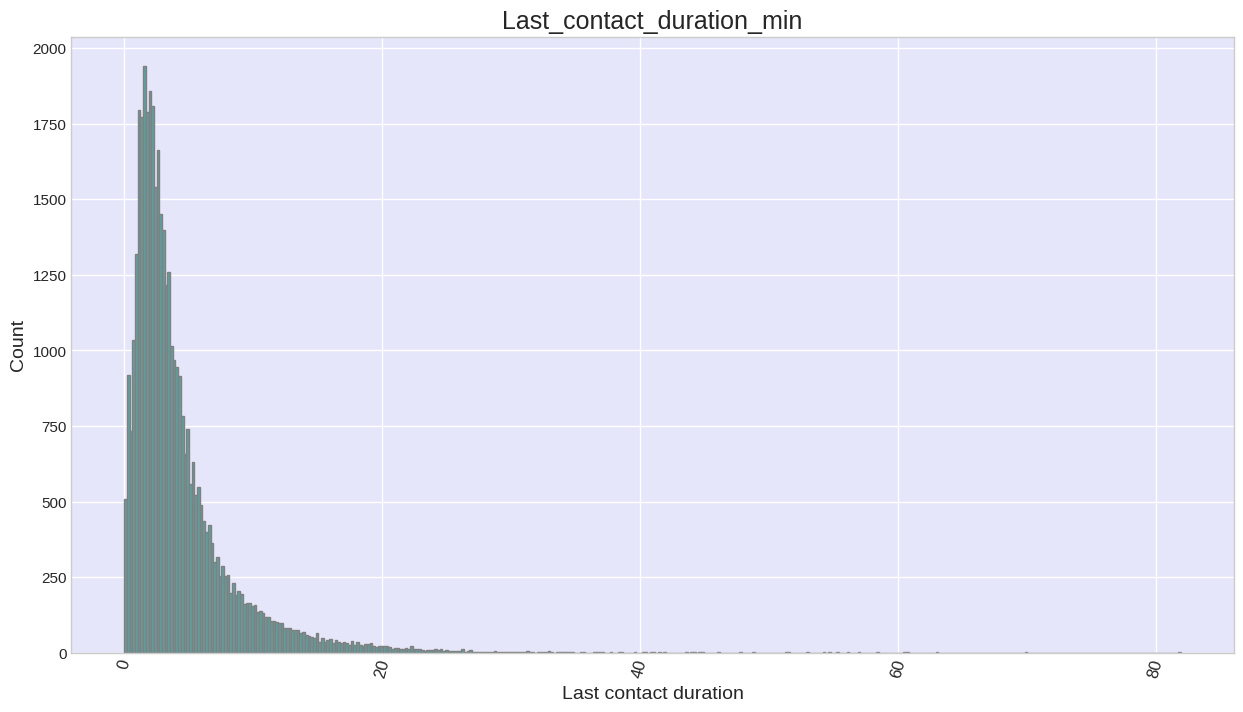

           counts  percentage
1.500000      170        0.41
1.416667      170        0.41
2.266667      168        0.41
1.216667      167        0.41
2.066667      163        0.40
...           ...         ...
26.150000       1        0.00
17.550000       1        0.00
21.050000       1        0.00
19.483333       1        0.00
31.133333       1        0.00

[1544 rows x 2 columns]


<ipython-input-22-8c7fc709d80a>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=paleturquoise`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_v2[field], color='cadetblue',shade='paleturquoise')


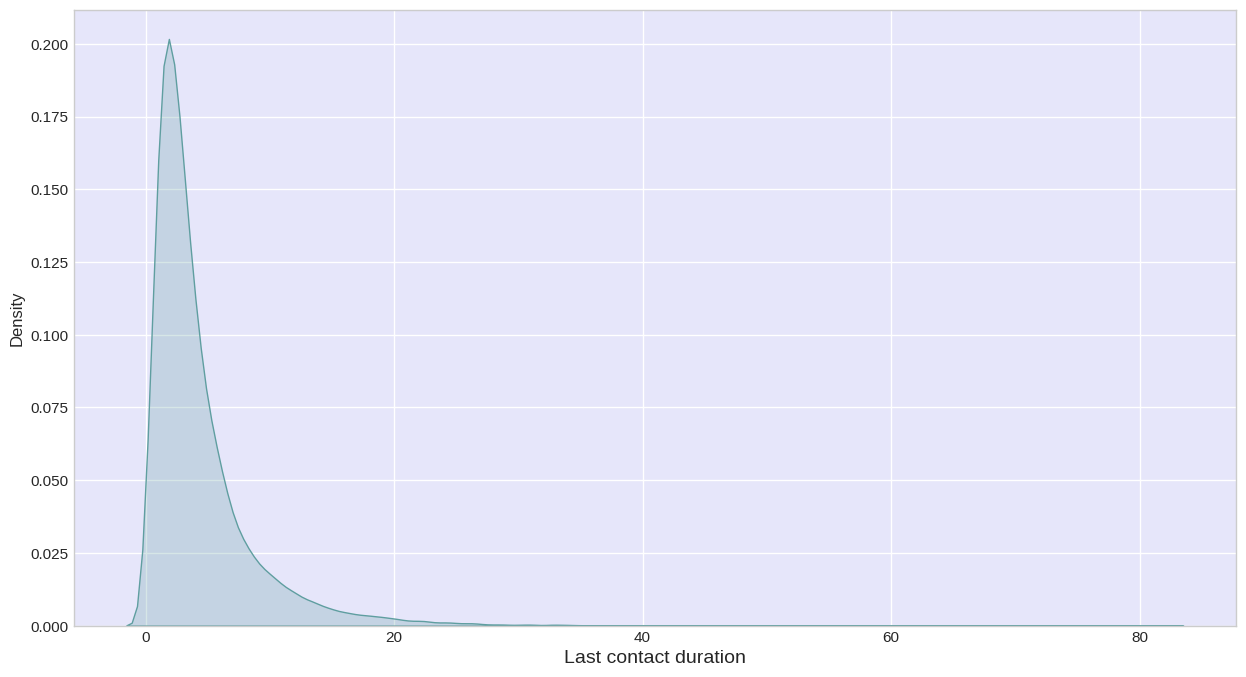

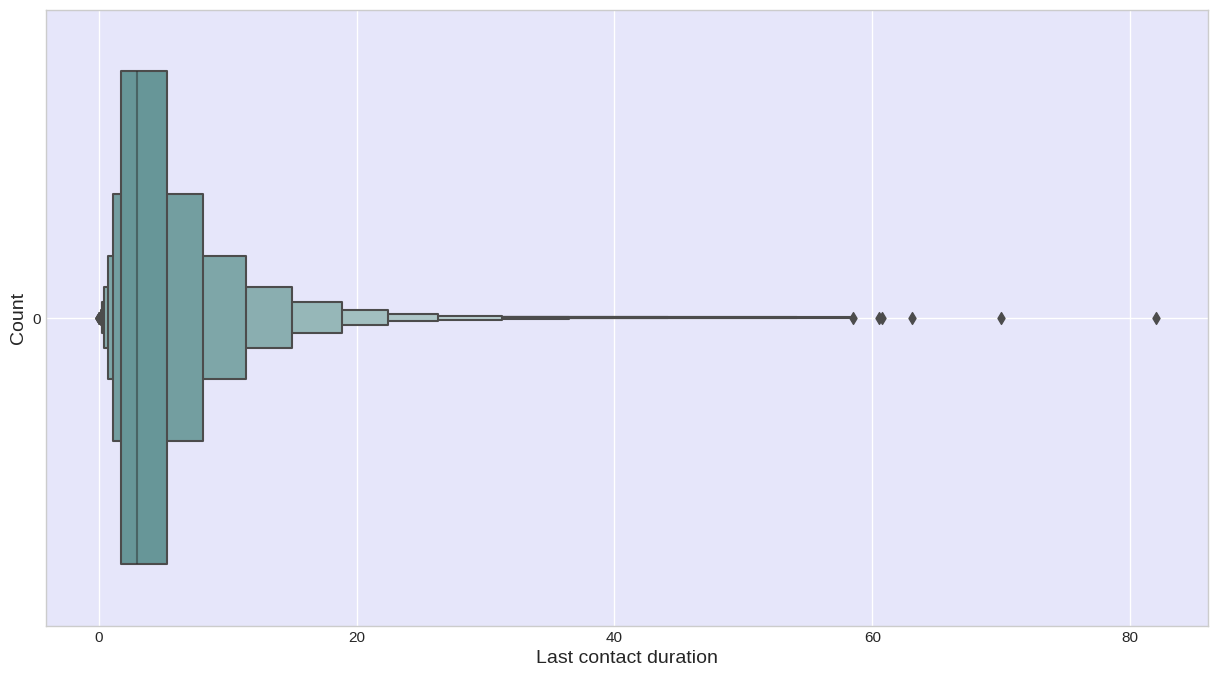

In [35]:
field="last_contact_duration_min"
xlabel="Last contact duration"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

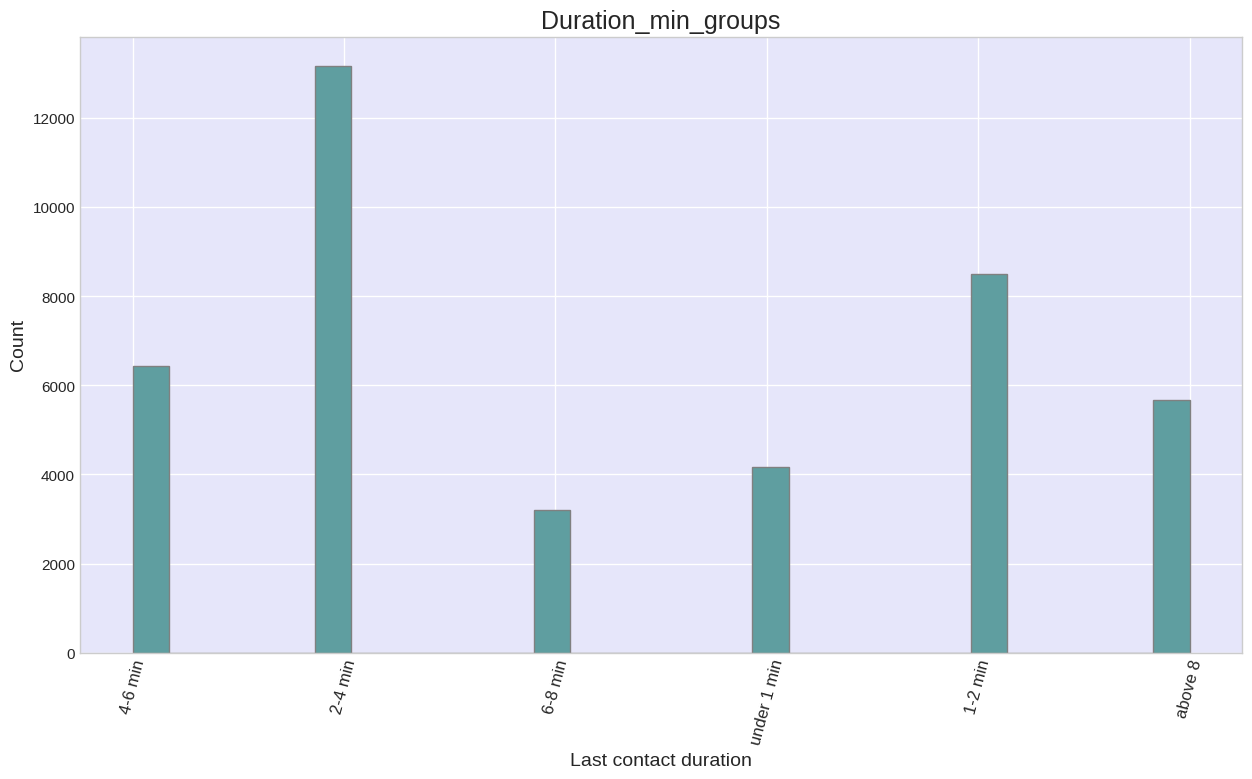

             counts  percentage
2-4 min       13172       31.99
1-2 min        8507       20.66
4-6 min        6435       15.63
above 8        5676       13.78
under 1 min    4175       10.14
6-8 min        3211        7.80


In [36]:
field="duration_min_groups"
xlabel="Last contact duration"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

In [37]:
df_v2['last_contact_duration_min'].describe()

count    41176.000000
mean         4.305264
std          4.321755
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: last_contact_duration_min, dtype: float64

In [38]:
df_v2['last_contact_duration'].max()

4918

 - 75% cuộc gọi kéo dài dưới 319 giây (5 phút), chỉ 25% cuộc gọi kéo dài hơn 319 giây (5 phút)
 - Trung vị thấp hơn nhiều so với trung bình => có rất nhiều cuộc gọi có thời lượng thấp hơn trung bình
 - Thời lượng tối đa là khoảng 81 phút (1 giờ 20 phút)
 - Nhóm thời lượng cao nhất là "2-4 phút" với 30% tổng số cuộc gọi và "1-2 phút" với 21%
 - Có khoảng 10% cuộc gọi dưới 1 phút
 - Khoảng 14% cuộc gọi kéo dài hơn 8 phút

**Campaign**





<ipython-input-22-8c7fc709d80a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


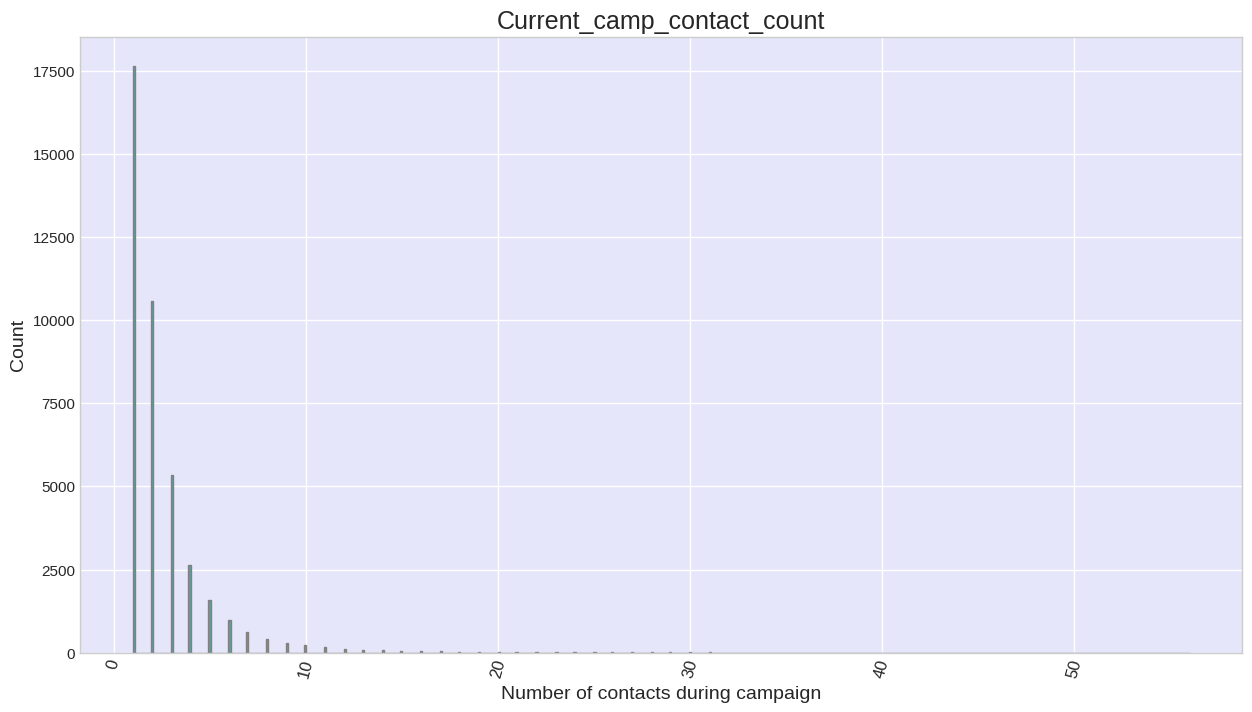

    counts  percentage
1    17634       42.83
2    10568       25.67
3     5340       12.97
4     2650        6.44
5     1599        3.88
6      979        2.38
7      629        1.53
8      400        0.97
9      283        0.69
10     225        0.55
11     177        0.43
12     125        0.30
13      92        0.22
14      69        0.17
17      58        0.14
16      51        0.12
15      51        0.12
18      33        0.08
20      30        0.07
19      26        0.06
21      24        0.06
22      17        0.04
23      16        0.04
24      15        0.04
27      11        0.03
29      10        0.02
28       8        0.02
26       8        0.02
25       8        0.02
31       7        0.02
30       7        0.02
35       5        0.01
32       4        0.01
33       4        0.01
34       3        0.01
42       2        0.00
40       2        0.00
43       2        0.00
56       1        0.00
39       1        0.00
41       1        0.00
37       1        0.00


<ipython-input-22-8c7fc709d80a>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=paleturquoise`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_v2[field], color='cadetblue',shade='paleturquoise')


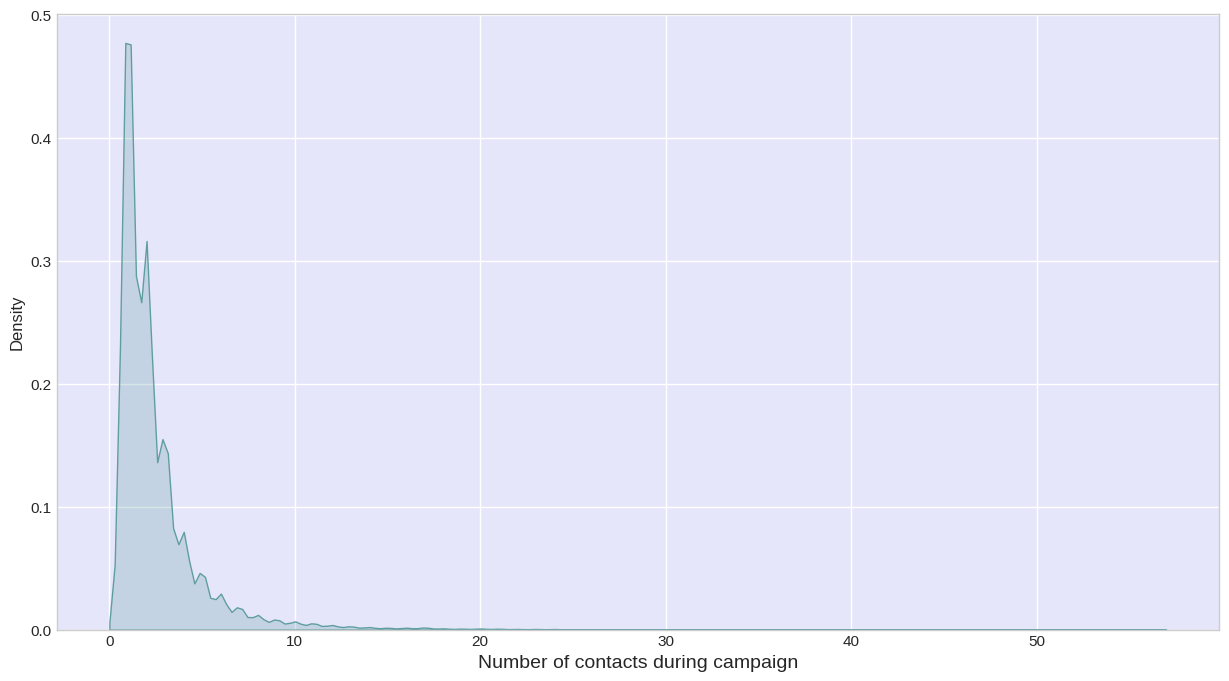

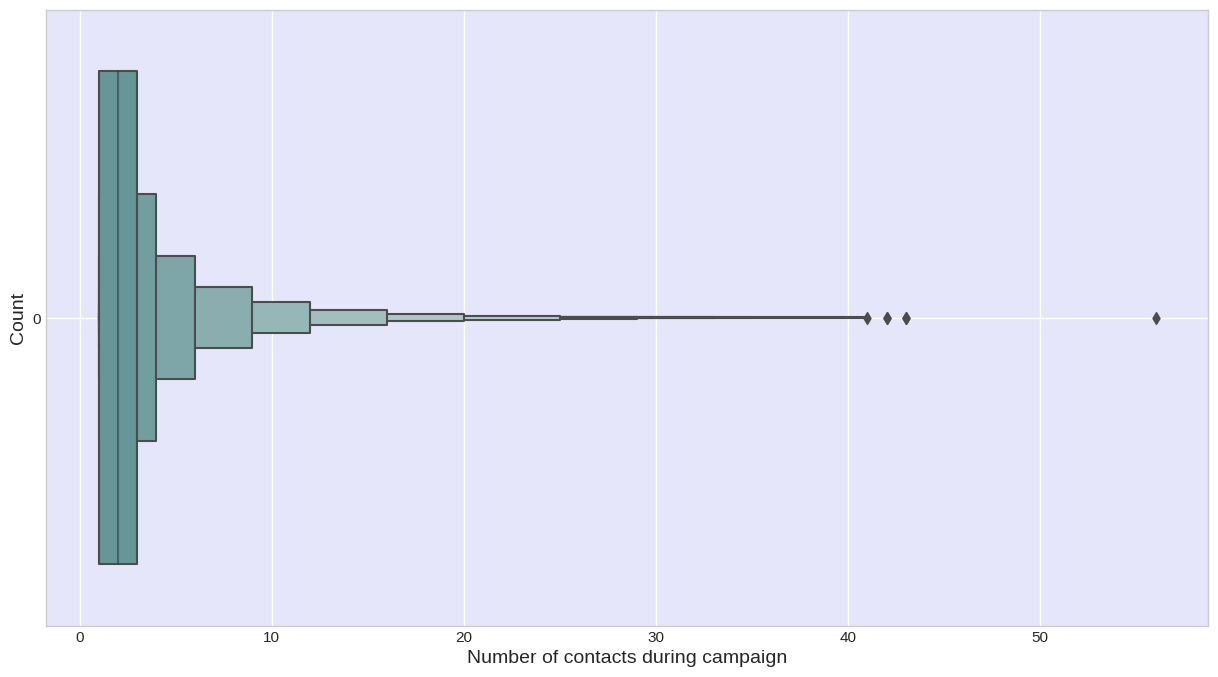

In [39]:
field="current_camp_contact_count"
xlabel="Number of contacts during campaign"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)


- 43% khách hàng được gọi một lần, 25% - 2 lần và 13% - 3 lần

**Previous outcome**



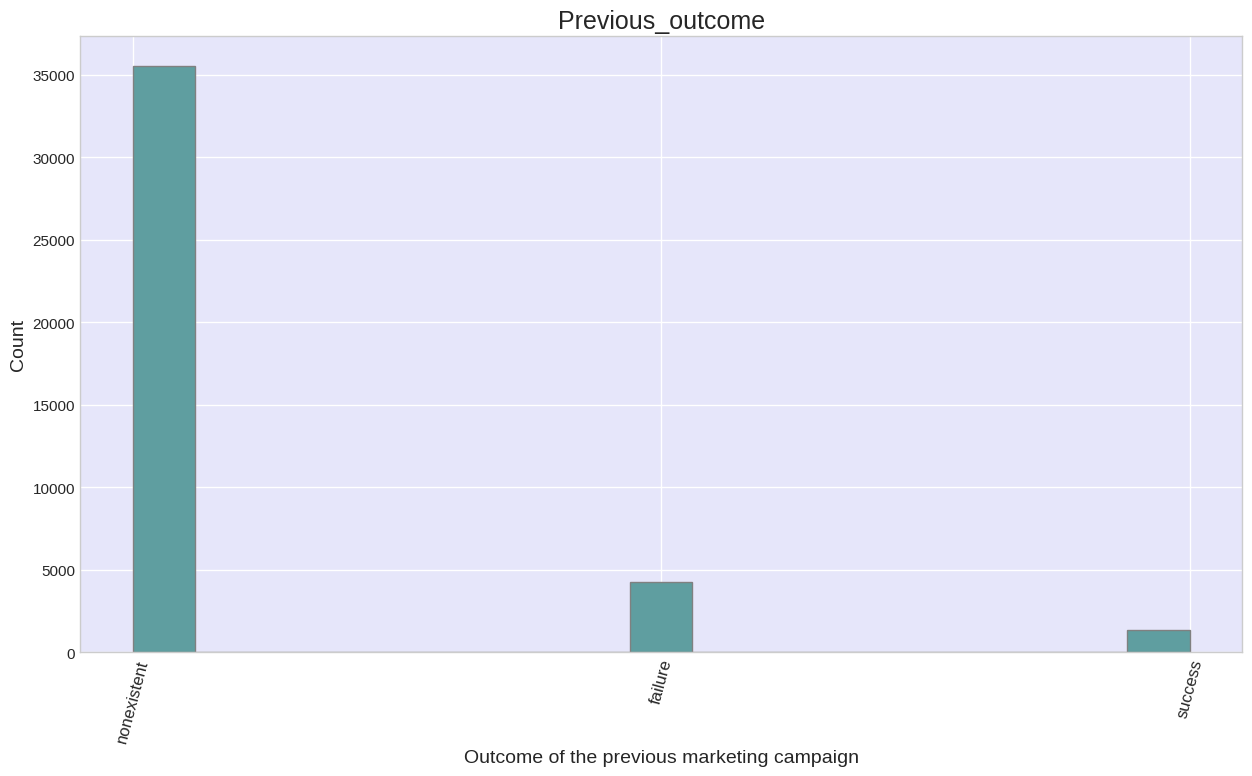

             counts  percentage
nonexistent   35551       86.34
failure        4252       10.33
success        1373        3.33


In [42]:
field="previous_outcome"
xlabel="Outcome of the previous marketing campaign"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

- Không có thông tin cho 86% khách hàng phù hợp với chỉ báo trước đó cho biết 86% khách hàng được liên hệ lần đầu
- Chỉ 3,3% khách hàng đăng ký gửi tiền trong chiến dịch trước

### Numerical vs categorical analysis

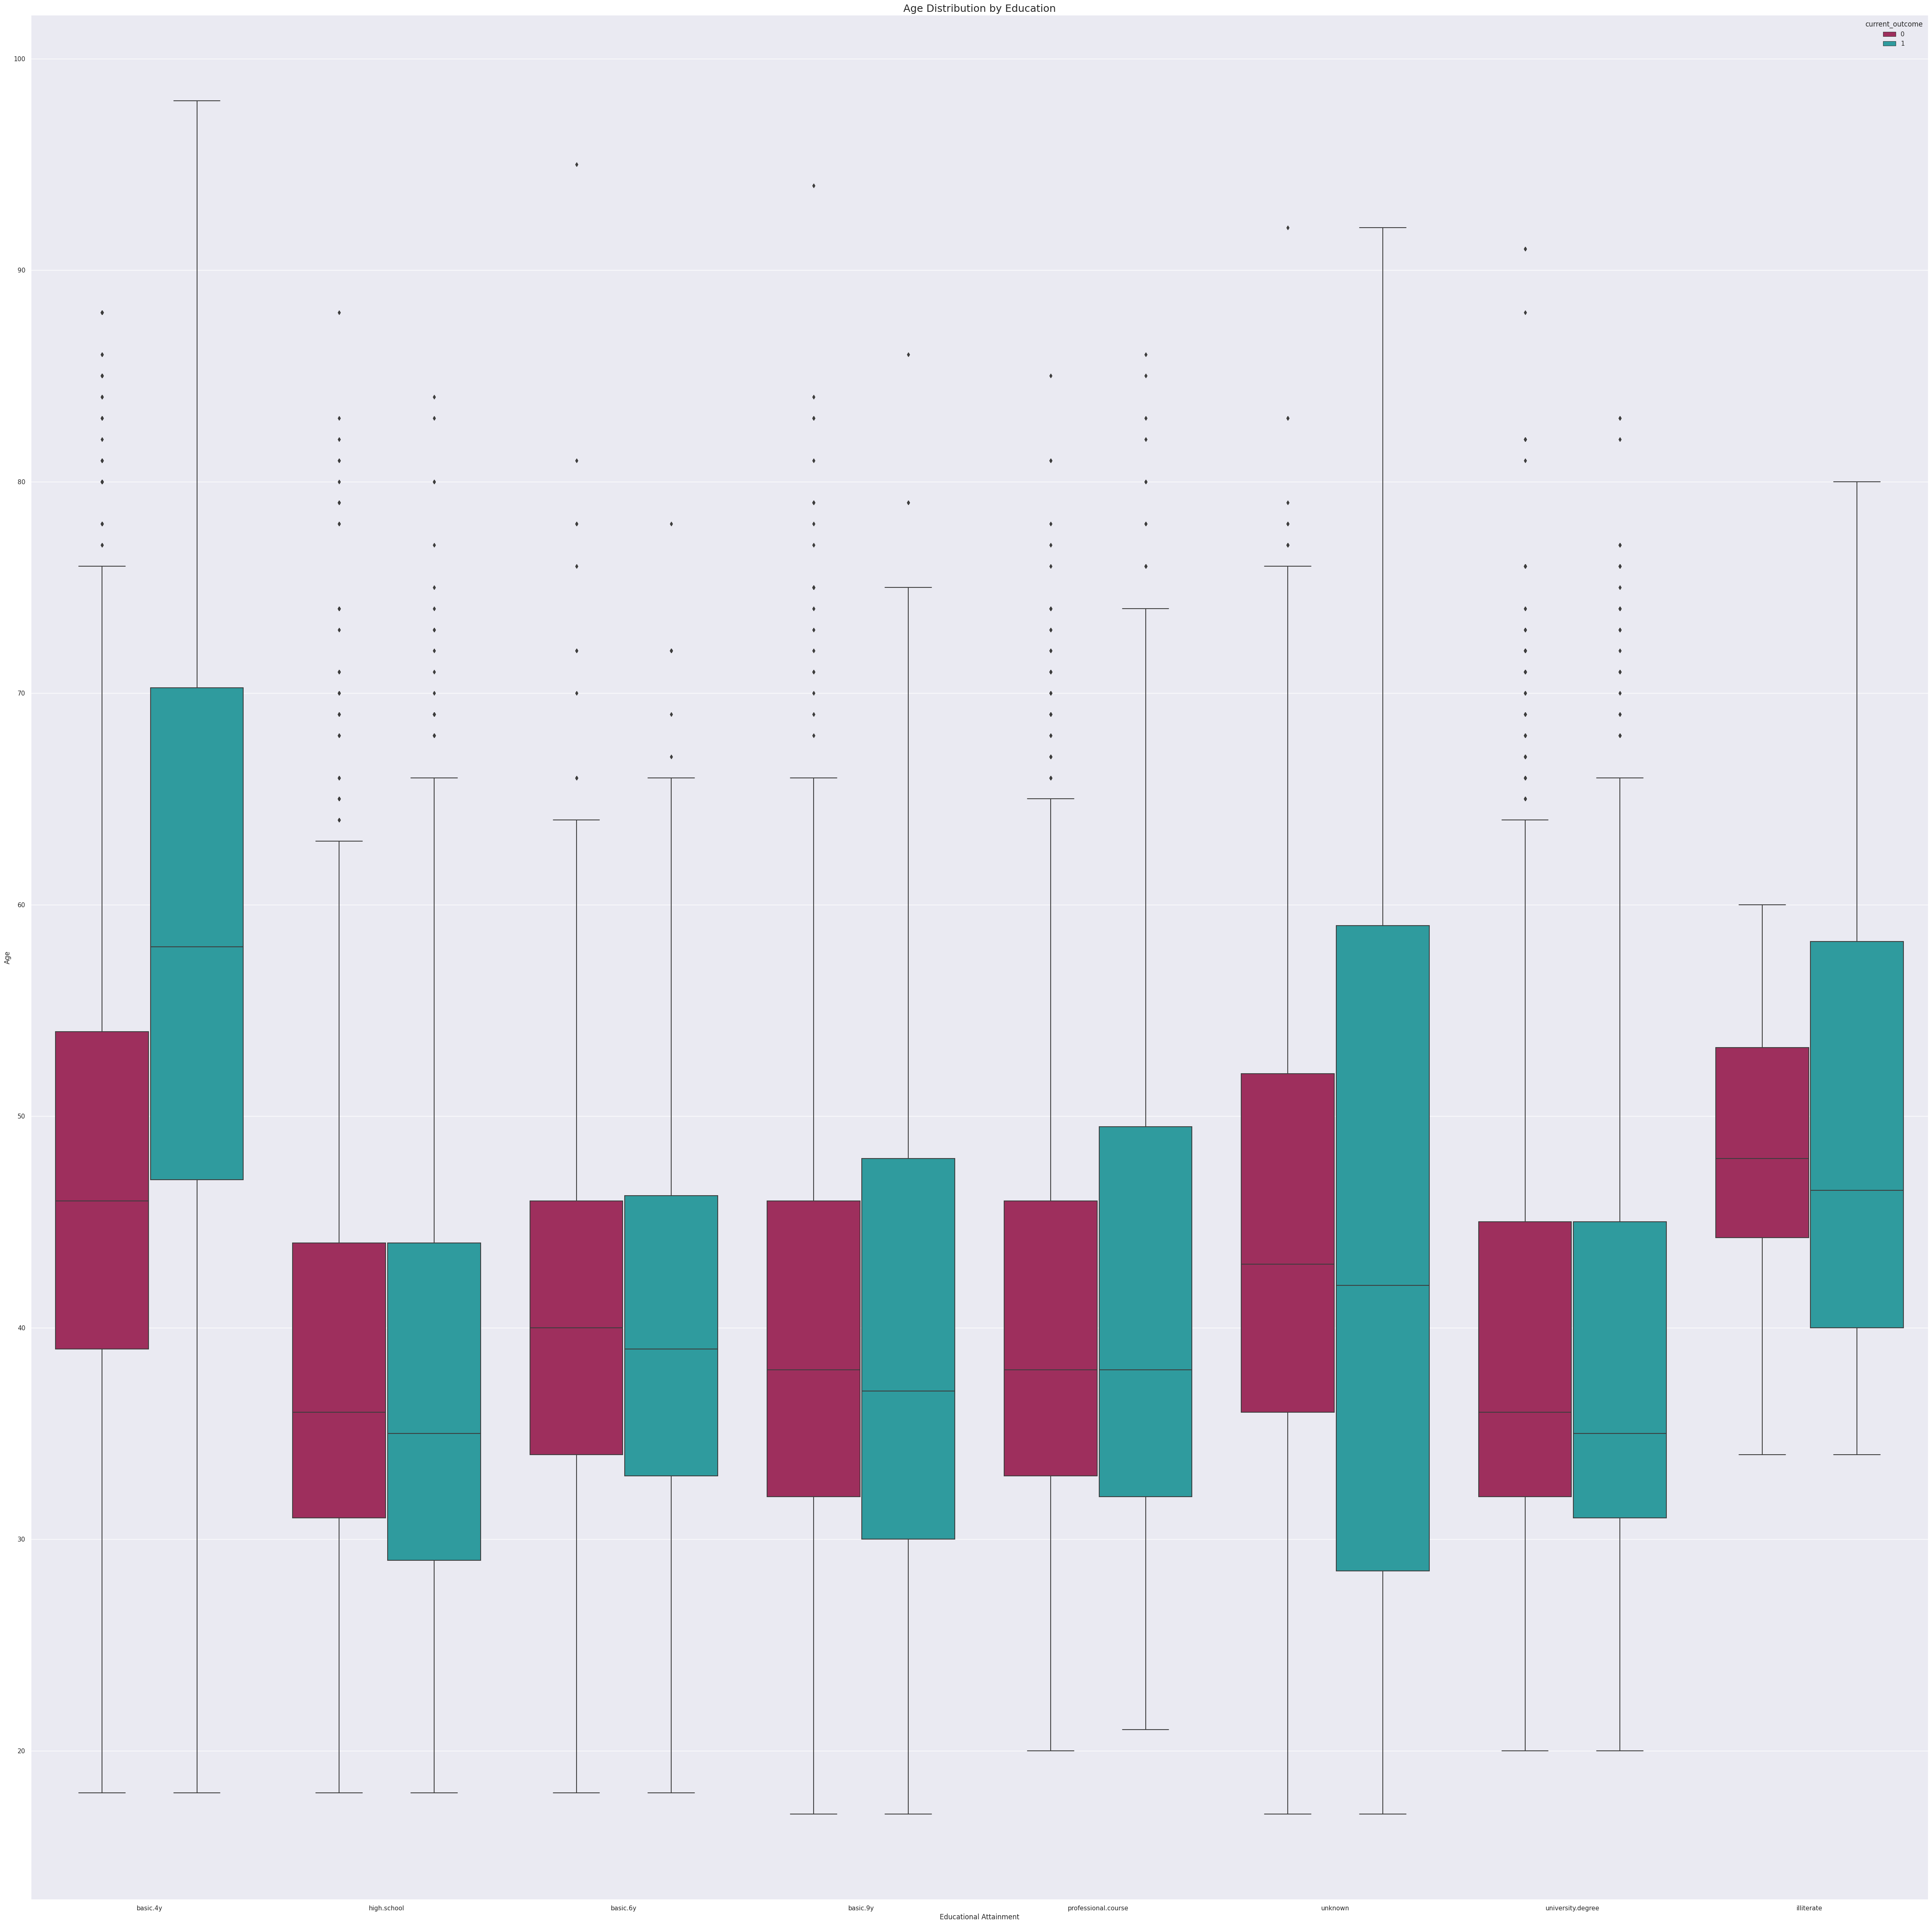

In [57]:
g=sns.boxplot(x='educational_attainment',y='age', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Educational Attainment')
g.set_ylabel('Age')
g.set_title('Age Distribution by Education', fontsize=18)
plt.show(g);

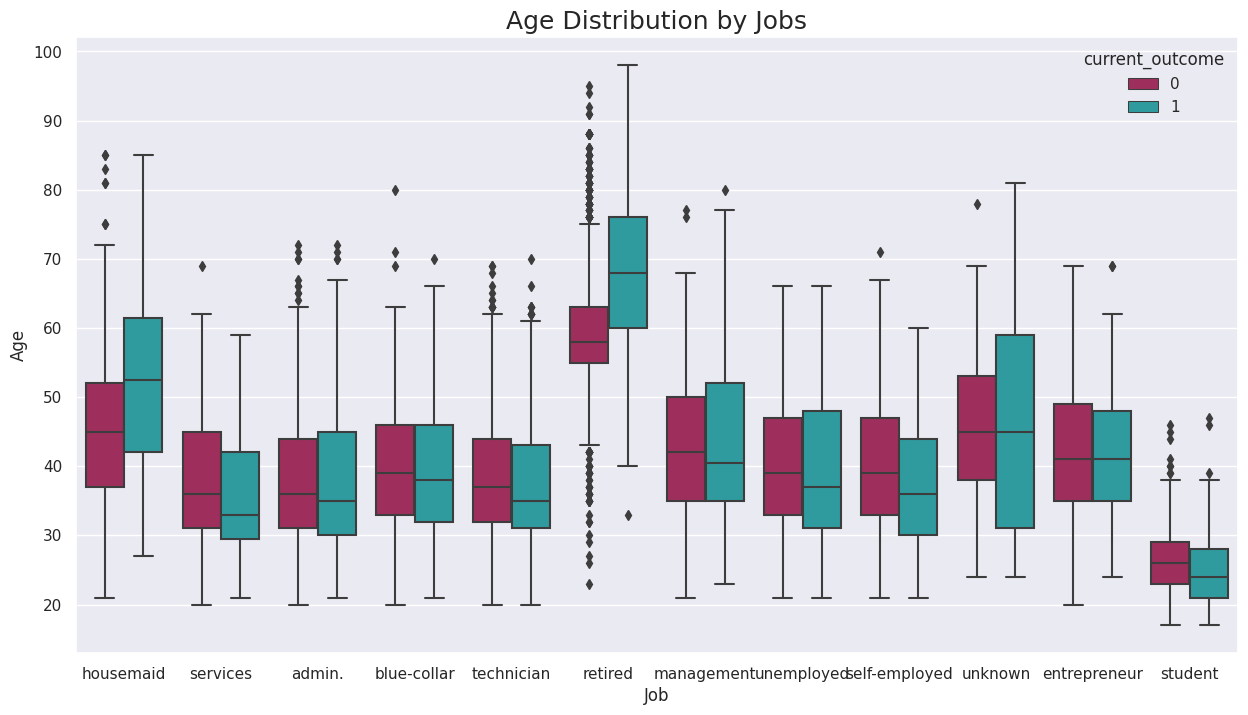

In [58]:
g=sns.boxplot(x='job',y='age', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Job')
g.set_ylabel('Age')
g.set_title('Age Distribution by Jobs',fontsize=18)

plt.show(g);

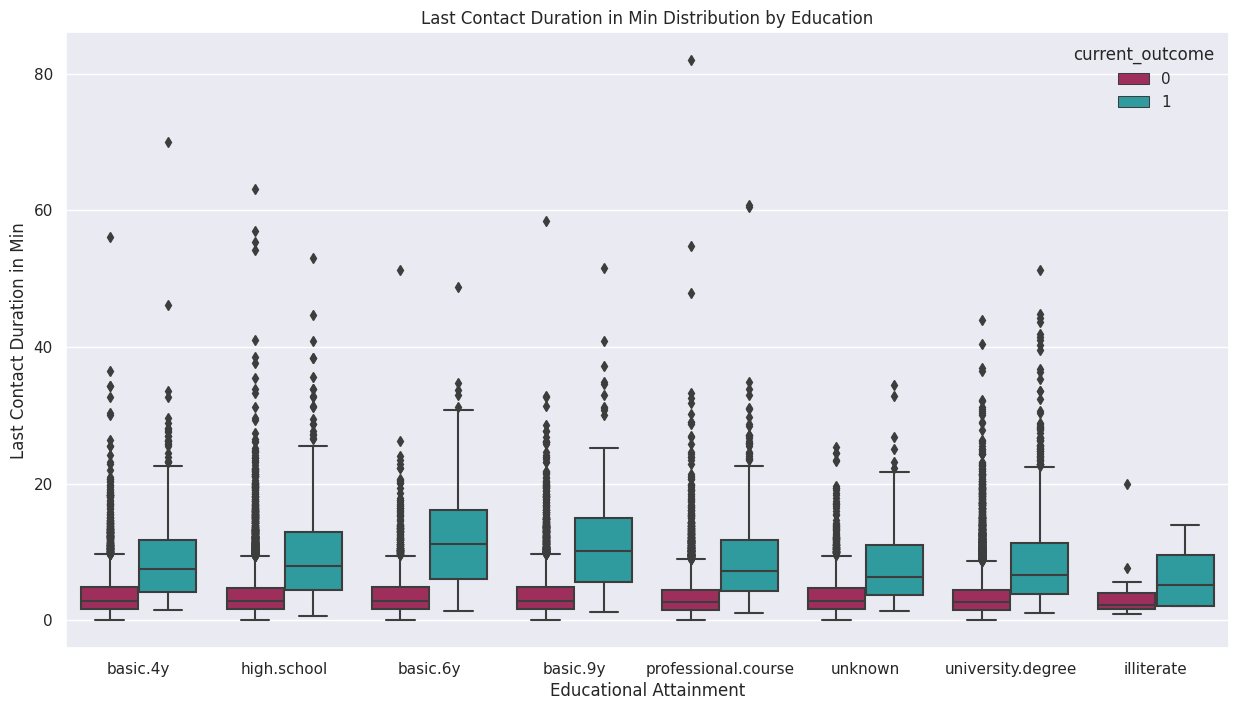

In [59]:
g=sns.boxplot(x='educational_attainment',y='last_contact_duration_min', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Educational Attainment')
g.set_ylabel('Last Contact Duration in Min')
g.set_title('Last Contact Duration in Min Distribution by Education')

plt.show(g);

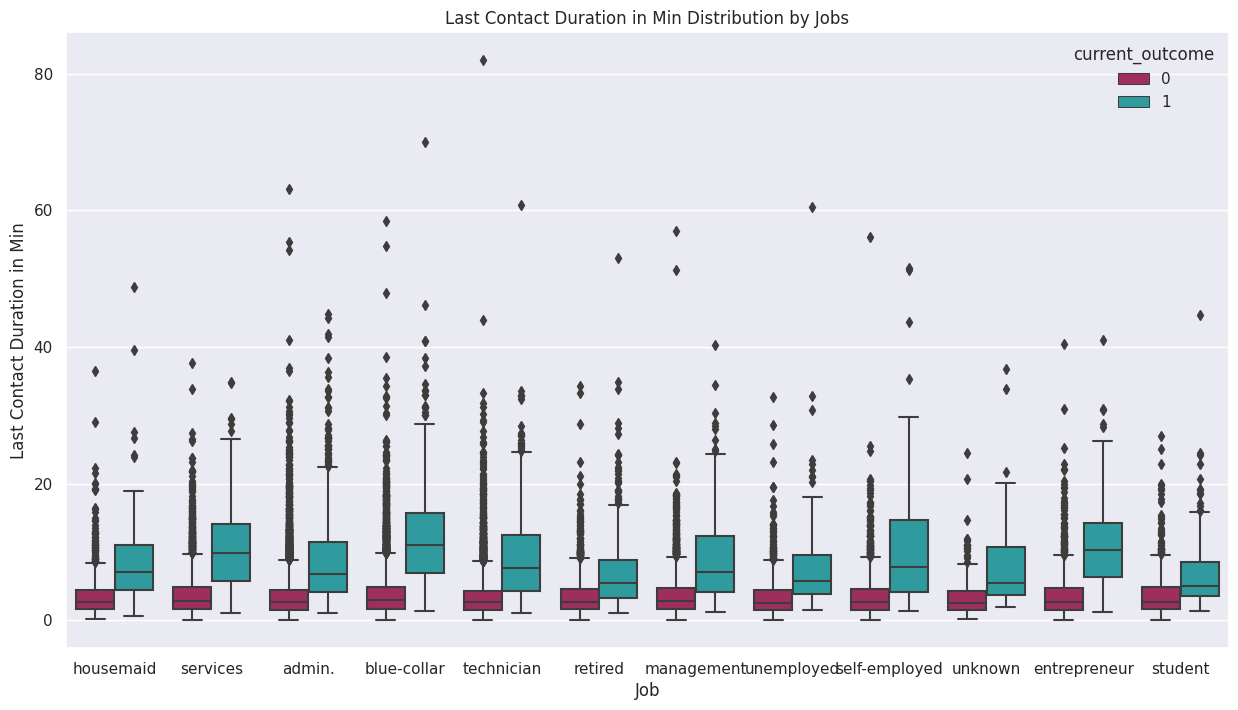

In [60]:
g=sns.boxplot(x='job',y='last_contact_duration_min', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Job')
g.set_ylabel('Last Contact Duration in Min')
g.set_title('Last Contact Duration in Min Distribution by Jobs')

plt.show(g);

### Categorical vs Categorical

In [61]:
def plot_bivariate(field, xlabel, ylabel):
    #countplot
    ax=sns.countplot(y=df_v2[field], hue='current_outcome', data=df_v2, order=df_v2[field].value_counts().index, palette=["#b01c5a","#1cadb0"])
    sns.set(rc = {'figure.figsize':(20,10)})
    sns.move_legend(ax, "lower right")
    total = len(df['job'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
           
   
    plt.title(field.capitalize(), fontsize=16)
    plt.xlabel(xlabel.capitalize(), fontsize = 12)
    plt.ylabel(ylabel, fontsize = 11)
    plt.style.use('seaborn-whitegrid')
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
    #crosstab
    data_crosstab = pd.crosstab(df_v2[field], df_v2['current_outcome'], margins =True)
    print(data_crosstab)

**Job Categories by Subscription**



<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


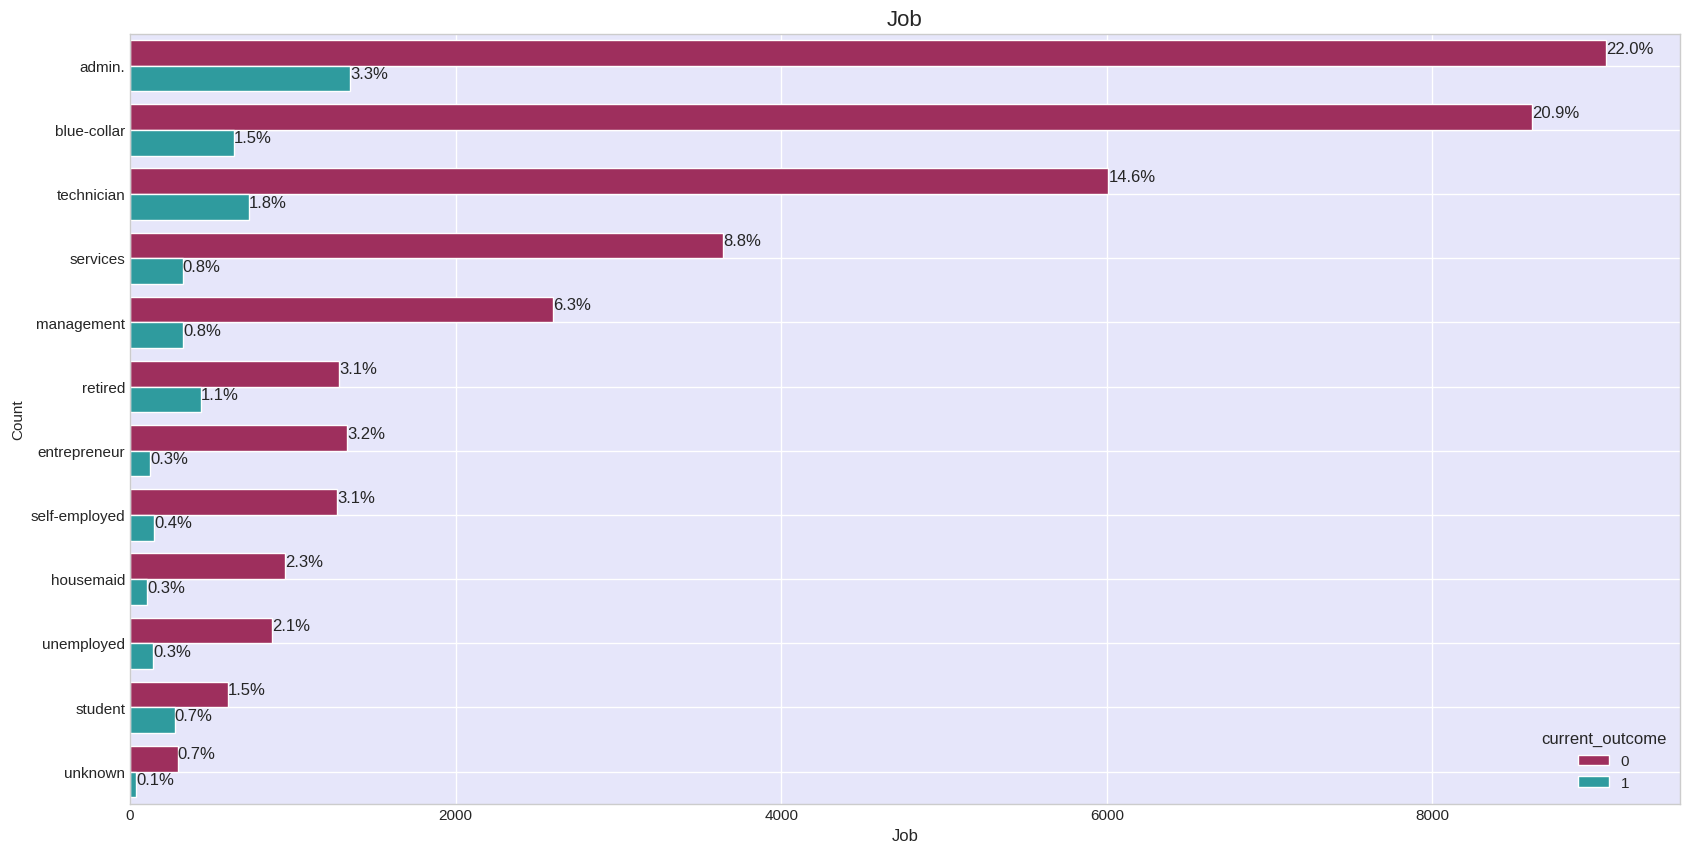

current_outcome      0     1    All
job                                
admin.            9068  1351  10419
blue-collar       8615   638   9253
entrepreneur      1332   124   1456
housemaid          954   106   1060
management        2596   328   2924
retired           1284   434   1718
self-employed     1272   149   1421
services          3644   323   3967
student            600   275    875
technician        6009   730   6739
unemployed         870   144   1014
unknown            293    37    330
All              36537  4639  41176


In [74]:
field="job"
xlabel="Job"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

Admin, blue-collars and technicians đăng ký nhiều nhất nhưng cũng được liên lạc và nhắm mục tiêu nhiều nhất.
Students and retired đăng ký tỷ lệ tương đối cao mặc dù không được liên lạc nhiều lần - Students and retired nên được chú ý đặc biệt trong chiến dịch tiếp theo.

**Educational Attainment by Subscription**



In [ ]:
field="educational_attainment"
xlabel="Educational Attainment"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

Khách hàng có bằng cử nhân, bằng tốt nghiệp trung học và khóa học chuyên nghiệp thường có lượt đăng ký nhiều nhất.

**Age Groups**


<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


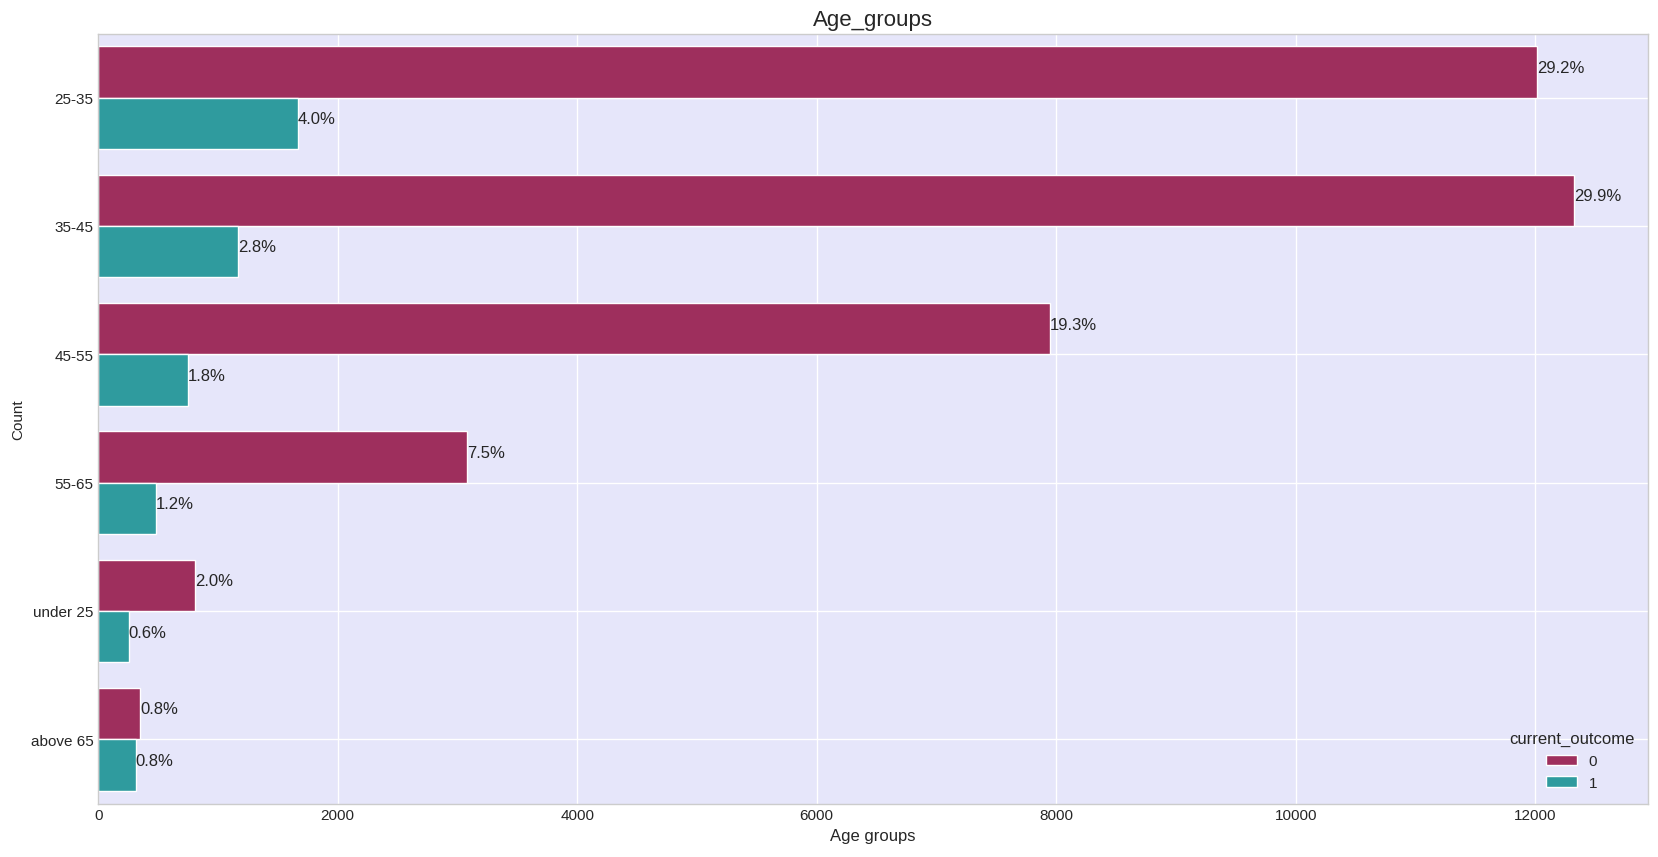

current_outcome      0     1    All
age_groups                         
25-35            12018  1666  13684
35-45            12327  1168  13495
45-55             7950   752   8702
55-65             3082   484   3566
above 65           349   313    662
under 25           811   256   1067
All              36537  4639  41176


In [65]:
field="age_groups"
xlabel="Age Groups"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)


Nhóm tuổi 25-35, 35-45, 45-55 đăng ký nhiều nhất vì họ được nhắm mục tiêu nhiều nhất.
Tỷ lệ chuyển đổi của nhóm dưới 25 tuổi và trên 65 tuổi cao mặc dù không được nhắm mục tiêu rộng rãi.

**Duration in Minutes in Groups/Bins**

<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


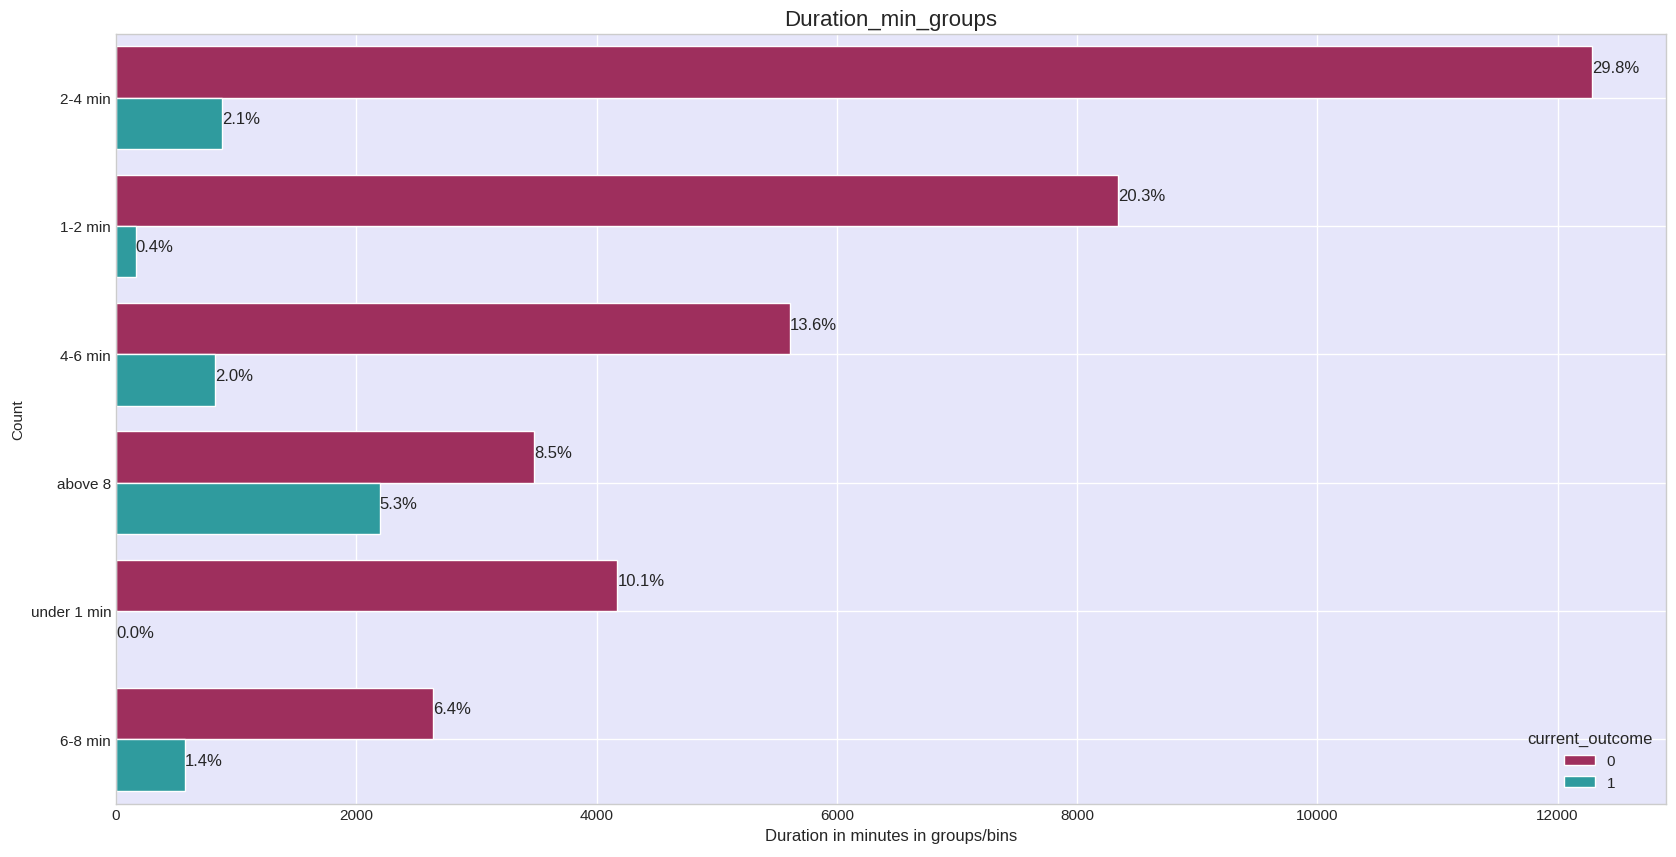

current_outcome          0     1    All
duration_min_groups                    
1-2 min               8344   163   8507
2-4 min              12289   883  13172
4-6 min               5612   823   6435
6-8 min               2636   575   3211
above 8               3482  2194   5676
under 1 min           4174     1   4175
All                  36537  4639  41176


In [66]:
field="duration_min_groups"
xlabel="Duration in Minutes in Groups/Bins"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

Thời lượng cuộc gọi trên 8 phút là khoảng thời gian gọi mà chuyển đổi khách hàng nhiều nhất.
Thời lượng cuộc gọi từ 4-6 phút là thứ hai về tỷ lệ chuyển đổi.
-> Nhân viên bán hàng nên có kế hoạch trò chuyện và gợi ý đủ để duy trì cuộc trò chuyện trong khoảng 6-8 phút hoặc lâu hơn. Vì có khả năng cuộc gọi trở nên dài, nên đặt lịch trước thay vì gọi ngẫu nhiên.

**Personal Loan by Subscription**

- Clients that have a personal loan are not likely to subscribe, **it is more efficient to target clients without loans**;


<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


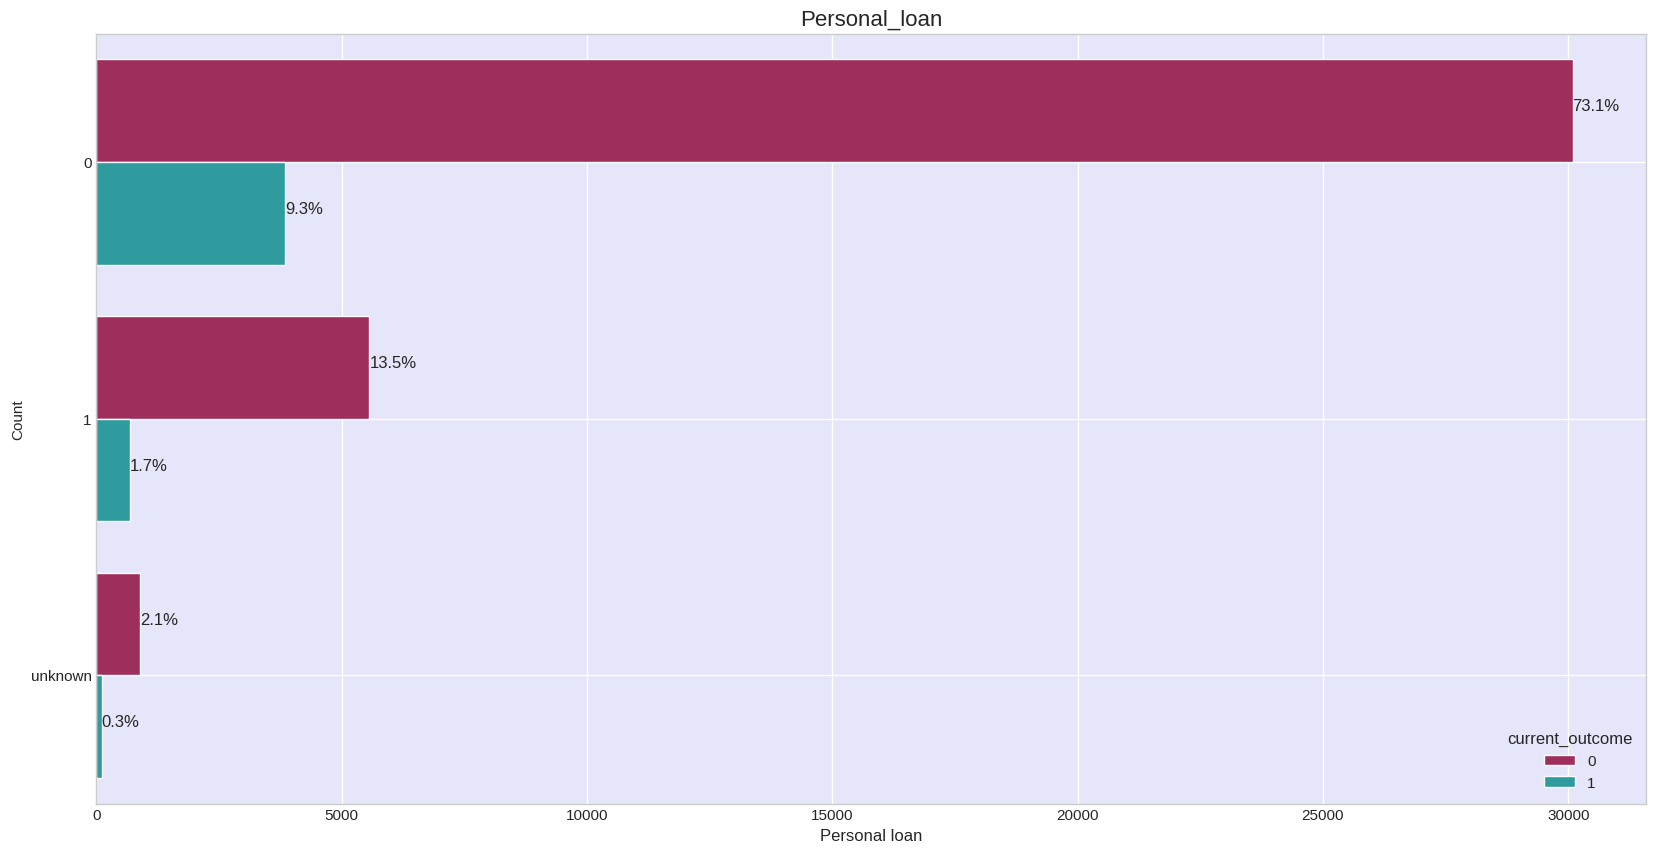

current_outcome      0     1    All
personal_loan                      
0                30089  3849  33938
1                 5565   683   6248
unknown            883   107    990
All              36537  4639  41176


In [69]:
field="personal_loan"
xlabel="Personal Loan"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Contact Type by Subscription**



<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


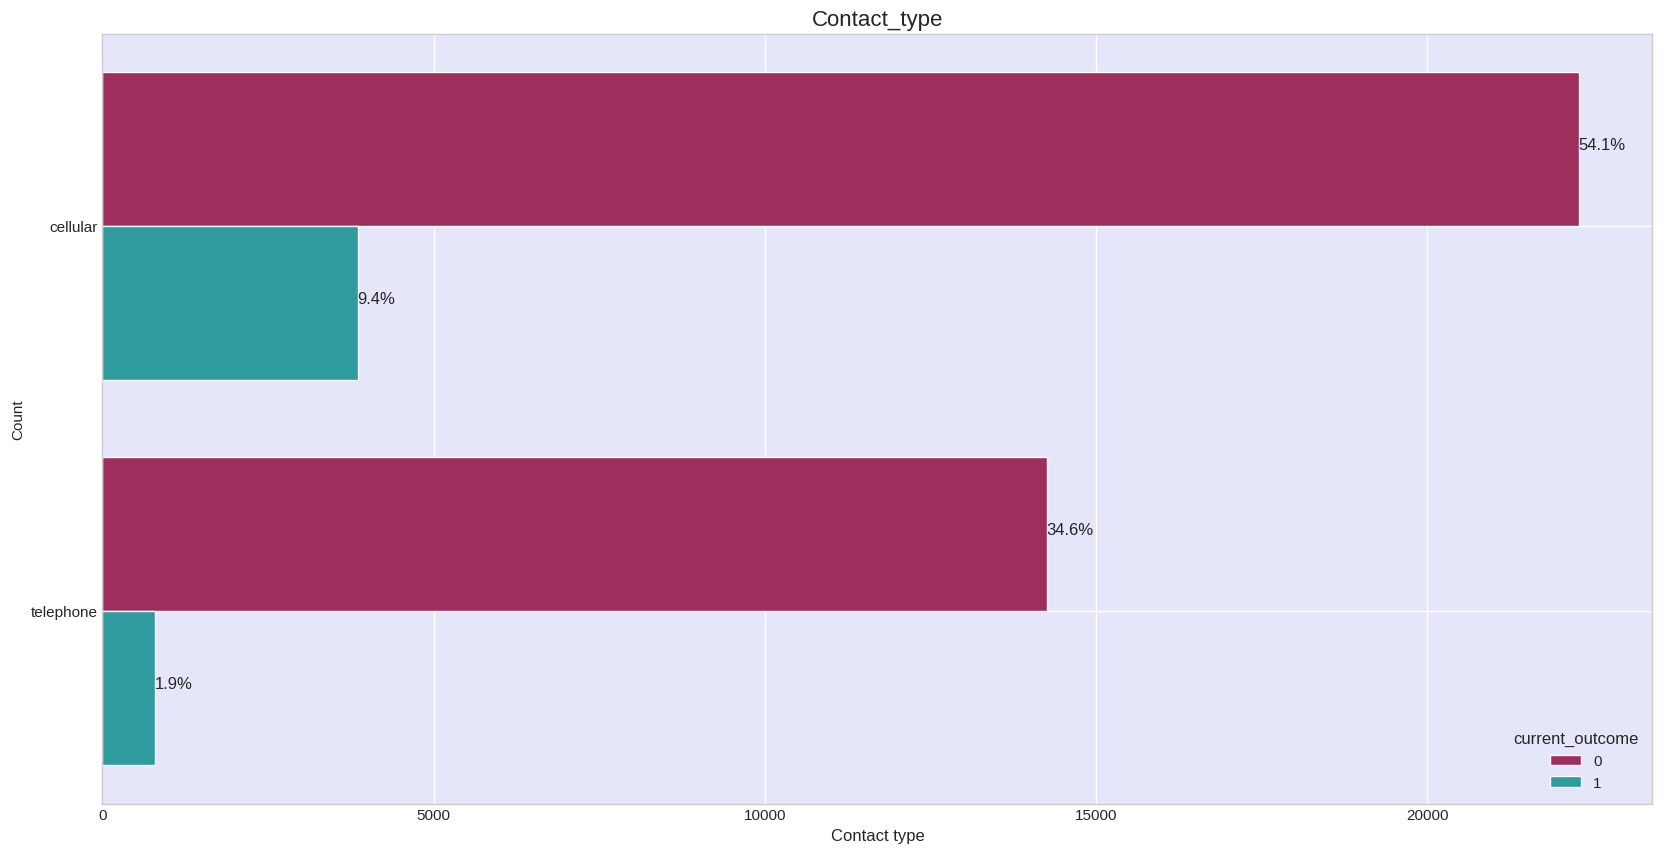

current_outcome      0     1    All
contact_type                       
cellular         22283  3852  26135
telephone        14254   787  15041
All              36537  4639  41176


In [70]:
field="contact_type"
xlabel="Contact Type"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

Những người được liên lạc qua điện thoại di động đã đăng ký thường xuyên hơn

**Last Contact Month by Subscription**



<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


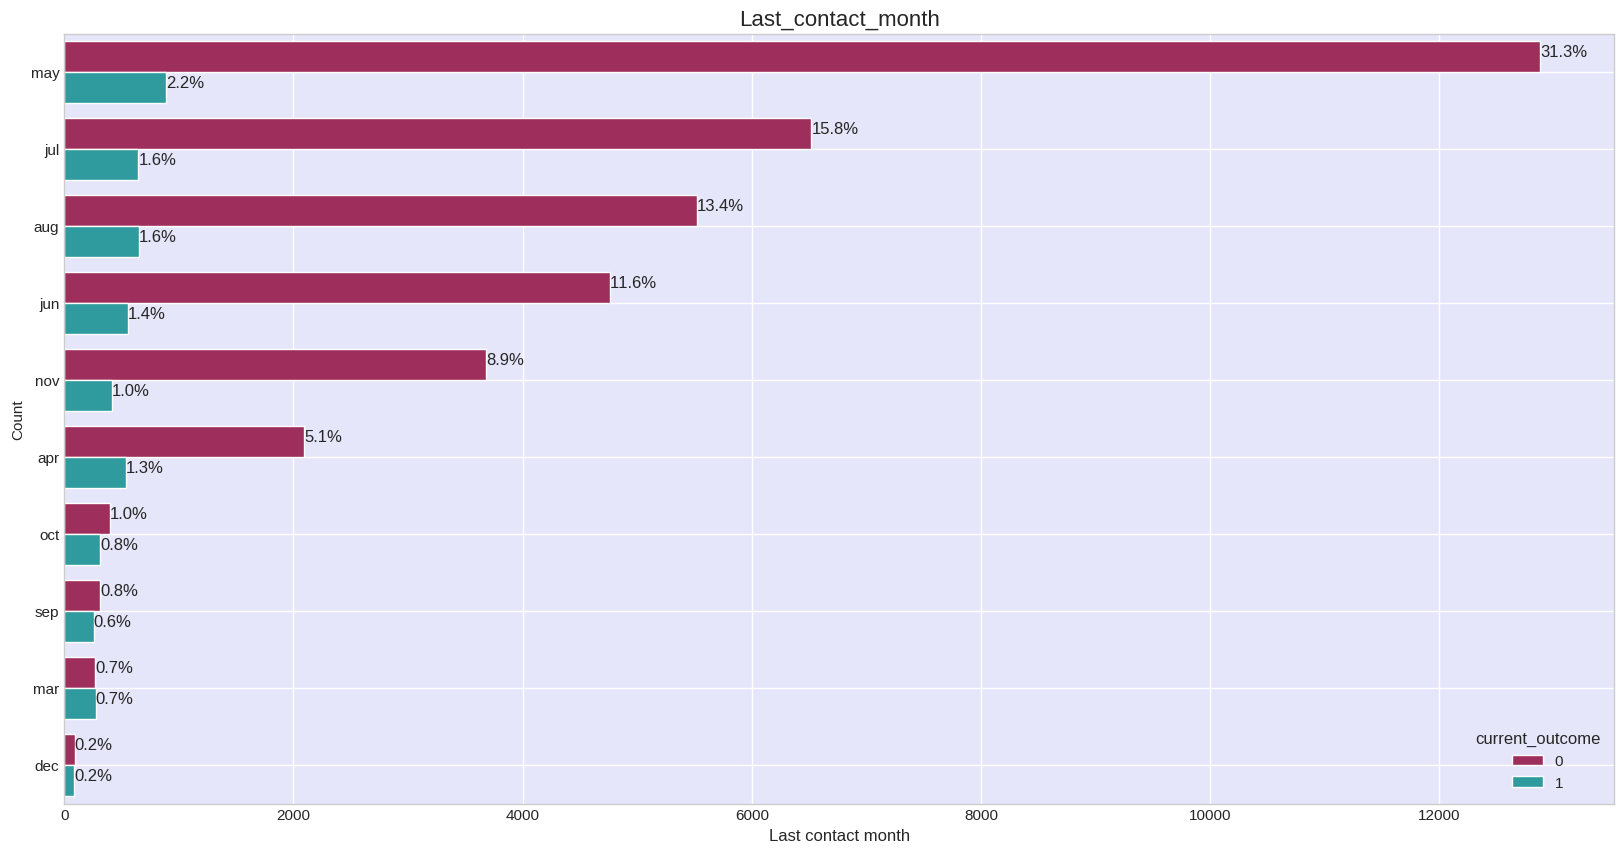

current_outcome         0     1    All
last_contact_month                    
apr                  2092   539   2631
aug                  5521   655   6176
dec                    93    89    182
jul                  6521   648   7169
jun                  4759   559   5318
mar                   270   276    546
may                 12881   886  13767
nov                  3684   416   4100
oct                   402   315    717
sep                   314   256    570
All                 36537  4639  41176


In [71]:
field="last_contact_month"
xlabel="Last Contact Month"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

- Các đại lý bán hàng hoạt động tích cực nhất trong tháng 5 và thực hiện 34% cuộc gọi trong tháng đó;
- Xu hướng tăng vào mùa xuân, cao vào mùa hạ và giảm dần vào mùa thu;
- **Đại lý bán hàng nên bắt đầu chiến dịch vào tháng 3 và kết thúc vào tháng 11**.


**Previous Outcome by Subscription**
 


<ipython-input-61-12352a857c13>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


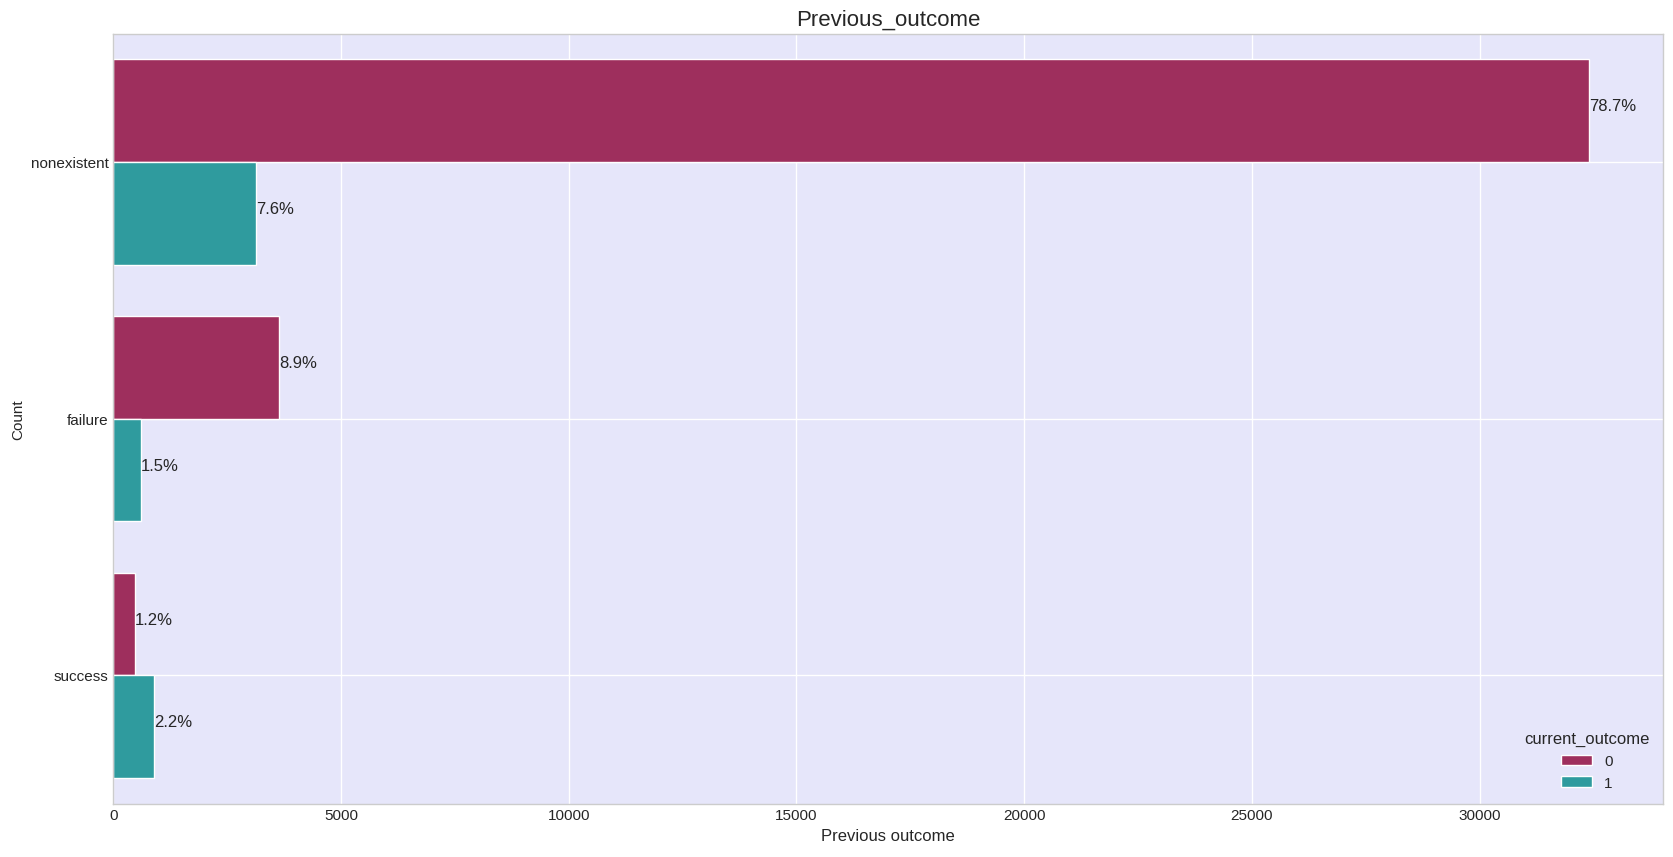

current_outcome       0     1    All
previous_outcome                    
failure            3647   605   4252
nonexistent       32411  3140  35551
success             479   894   1373
All               36537  4639  41176


In [73]:
field="previous_outcome"
xlabel="Previous Outcome"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

Việc có nợ xấu và khoản vay cá nhân có thể là một biến có ý nghĩa cho chiến dịch bán hàng trong tương lai và các nhân viên bán hàng có thể tiết kiệm thời gian bằng cách nhắm đến khách hàng không có nợ xấu và khoản vay cá nhân.

Các nhân viên bán hàng nên bắt đầu chiến dịch vào tháng Ba, tiếp tục đến cuối mùa hè và kết thúc vào tháng 11, trước kỳ nghỉ lễ. Nên điều tra nội bộ để hiểu tại sao có nhiều cuộc gọi được thực hiện vào tháng 5.

Tất cả các chỉ số kinh tế tổng quát như "Tỷ lệ biến động việc làm", "Chỉ số niềm tin người tiêu dùng" và "Chỉ số giá tiêu dùng" có mối tương quan cao. Điều này có thể ảnh hưởng đến mô hình vì hiện tượng đa tuyến và sẽ cần loại bỏ một số chỉ số.

Trong số các biến kinh tế tổng quát, chỉ có "Tỷ lệ biến động việc làm" và "Tỷ lệ Euribor" có đủ biến thiên và cho thấy mẫu tương quan thú vị, các biến khác không cho thấy bất kỳ tương quan thú vị nào và có thể được loại bỏ.

"Thời lượng liên lạc cuối cùng" và "Tuổi": Khách hàng đã đăng ký có độ tuổi cao hơn so với khách hàng chưa đăng ký -> việc bán gửi tiền đòi hỏi cuộc trò chuyện lâu hơn.

"Tỷ lệ biến động việc làm" và "Tuổi": Khách hàng đăng ký trong điều kiện thị trường lao động bất ổn hơn khi tỷ lệ biến động việc làm âm từ -1 đến -3 với các nhóm tuổi đa dạng -> nhân viên bán hàng nên tham gia tích cực hơn vào các chiến dịch khi tỷ lệ này âm/giảm vì lựa chọn việc làm hạn chế - khách hàng có động lực tiết kiệm cao hơn.

"Tỷ lệ Euro Interbank" và "Tuổi": Có nhiều khách hàng dưới 50 tuổi đã đăng ký gửi tiền trong thời điểm thuận lợi có tỷ lệ liên ngân hàng cao, các nhóm tuổi đa dạng đăng ký khi tỷ lệ từ 1 đến 2 -> nhân viên bán hàng nên tham gia tích cực hơn vào các chiến dịch khi tỷ lệ này cao.

"Số lần liên lạc trong chiến dịch hiện tại" và "Thời lượng liên lạc cuối cùng": Có hai nhóm khách hàng rõ rệt đã được liên lạc nhiều lần, hơn 10 lần và thời lượng cuộc gọi ngắn hơn nhóm thứ hai, và nhóm thứ hai đã đăng ký ít hơn 10 lần và có cuộc trò chuyện lâu hơn -> nhân viên bán hàng không nên liên lạc với khách hàng quá 10 lần.

Phân loại công việc theo việc đăng ký: Vị trí quản lý, công nhân chân tay và kỹ thuật viên đăng ký nhiều nhất, nhưng cũng được liên lạc và nhắm mục tiêu nhiều nhất; Sinh viên và người đã nghỉ hưu đăng ký tỷ lệ nhiều hơn mặc dù không được liên lạc nhiều lần -> Sinh viên và người đã nghỉ hưu nên được chú ý đặc biệt trong chiến dịch tiếp theo.

Khách hàng có bằng cử nhân, bằng tốt nghiệp trung học và khóa học chuyên nghiệp đăng ký nhiều nhất.

Nhóm tuổi "25-35", "35-45", "45-55" đăng ký nhiều nhất vì họ được nhắm mục tiêu nhiều nhất; Tỷ lệ chuyển đổi của nhóm dưới 25 tuổi và trên 65 tuổi cao mặc dù không được nhắm mục tiêu rộng rãi.

Thời lượng cuộc gọi từ 8 phút trở lên là thời lượng chuyển đổi khách hàng nhiều nhất; Thời lượng cuộc gọi từ 4-6 phút là thứ hai theo tỷ lệ chuyển đổi -> nhân viên bán hàng nên có kế hoạch và gợi ý để có đủ thời gian trò chuyện trong khoảng 6-8 phút hoặc lâu hơn. Vì có khả năng cuộc gọi trở nên dài, nên đặt lịch trước thay vì gọi ngẫu nhiên.
